# Ensemble : Bagging

## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (1-이탈, 0-잔류, Target 변수)


In [2]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,3179,0,119512,51,31,248566,229,5,2,very_sat,very_high,considering,1
14926,14927,1,142144,192,15,774317,581,29,4,unsat,very_little,never_thought,1
15116,15117,1,142308,0,79,306426,497,1,1,sat,little,considering,0
12733,12734,1,113385,0,0,333599,819,1,6,very_unsat,very_high,considering,1
14032,14033,1,90348,209,10,637286,360,26,4,unsat,little,actively_looking_into_it,0


## 2.데이터 준비

### (1) 데이터 정리

In [3]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [53]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
y.head()

3178     1
14926    1
15116    0
12733    1
14032    0
Name: CHURN, dtype: int64

### (3) NA 조치

### (4) 가변수화

In [5]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

## 3.모델링 : 랜덤포레스트


In [7]:
# 모델 선언
model = RandomForestClassifier(n_estimators = 5, max_depth = 3)

In [8]:
# 학습
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [9]:
# 예측
pred = model.predict(x_val)

In [10]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       769
           1       0.70      0.62      0.66       731

    accuracy                           0.68      1500
   macro avg       0.69      0.68      0.68      1500
weighted avg       0.68      0.68      0.68      1500



## 4.시각화와 변수중요도

### (1) 모델의 내부를 살펴봅시다.

In [11]:
# 5개 decision tree
model.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=575060932),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=323091615),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=111757596),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1446626026),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=959626736)]

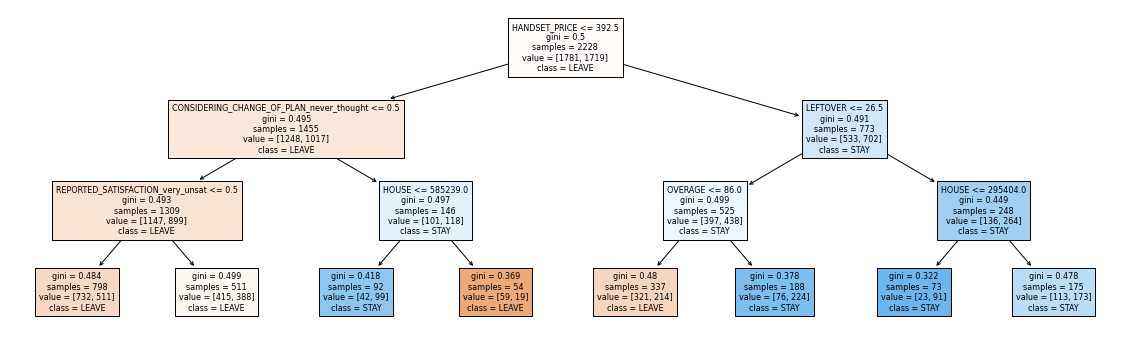

In [12]:
# 각 트리별로 시각화 할 수 있다.
plt.figure(figsize=(20,6))
plot_tree(model.estimators_[0], 
               feature_names = x_train.columns,
               class_names= ['LEAVE','STAY'], 
               filled = True, fontsize = 8);
plot_tree(model.estimators_[1], 
               feature_names = x_train.columns,
               class_names= ['LEAVE','STAY'], 
               filled = True, fontsize = 8);
plot_tree(model.estimators_[2], 
               feature_names = x_train.columns,
               class_names= ['LEAVE','STAY'], 
               filled = True, fontsize = 8);

### (2) 변수 중요도

In [13]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.         0.06827109 0.27744065 0.14452846 0.2587186  0.12142735
 0.10344283 0.00730514 0.         0.         0.         0.00880904
 0.         0.         0.         0.00326221 0.         0.00679463
 0.         0.        ]


* 변수중요도 그래프 그리기 함수 만들기

In [14]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

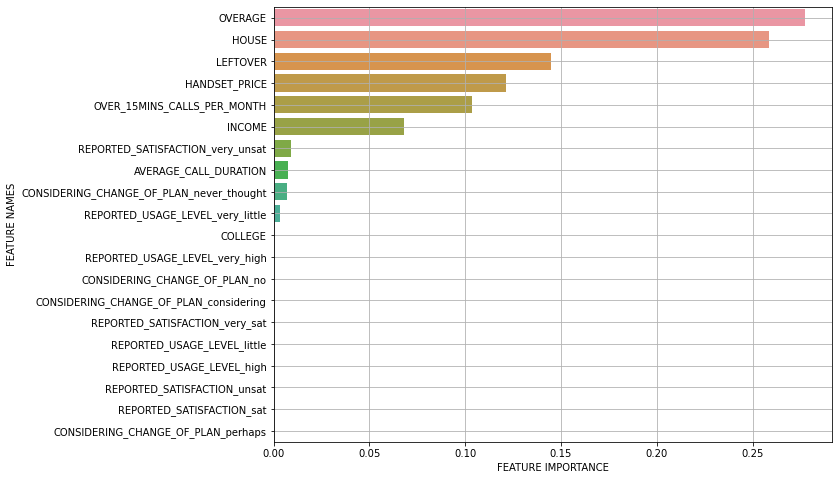

In [15]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)

## 5.실습: random forest 튜닝

* grid search를 수행합니다.
    * ① n_estimators 의 갯수를 5 ~ 200까지 5개씩 증가시켜가며 튜닝해 봅시다.
    * ② max_features를 1 ~ feature갯수까지 1씩 증가시켜가며 튜닝해 봅시다.
    * ③ n_estimators, max_features를 동시에 튜닝.

* 모델링 후 cv 평가 결과를 차트로 그려봅시다. 
* 튜닝된 모델로 부터 변수중요도를 뽑아 봅시다.


### (1) n_estimators 튜닝

In [16]:
params = {'n_estimators' : range(5,201,5)} # 100~200개 정도가 적당함.
#트리가 많아진다고 모델이 복잡해지지 않고, 오히려 과적합을 방지한다. 평균을 쓰기 때문.
# 과적합을 피하기 위햇 Random Forest 기법을 사용했다 -> True
model = RandomForestClassifier()
model_rf1 = GridSearchCV(model, params, cv=10)

In [17]:
model_rf1.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(5, 201, 5)})

In [18]:
pred1 = model_rf1.predict(x_val)

In [19]:
print(classification_report(y_val, pred1))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       769
           1       0.70      0.72      0.71       731

    accuracy                           0.71      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



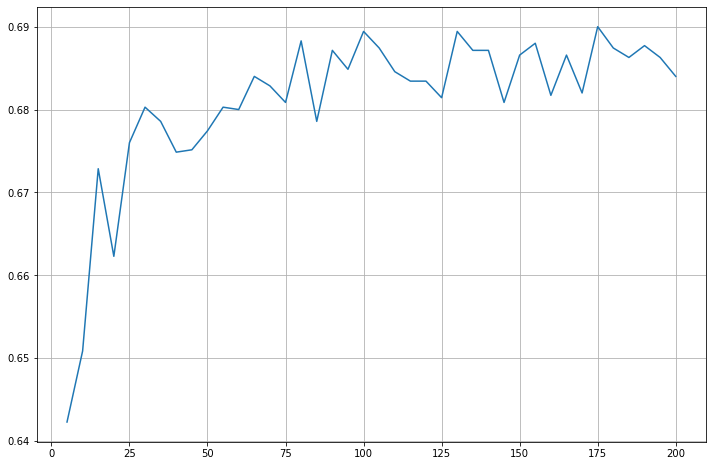

In [20]:
# 튜닝 결과를 그래프로 그리기
result = pd.DataFrame(model_rf1.cv_results_)
temp = result.loc[:, ['param_n_estimators', 'mean_test_score']]

plt.figure(figsize=(12,8))
plt.plot('param_n_estimators', 'mean_test_score', data=temp)
plt.grid()
plt.show()

### (2) max_features 튜닝

In [21]:
mSize = x_train.columns.size

In [31]:
params2 = {'max_features': range(1,mSize+1)}
model2 = RandomForestClassifier()
model_rf2 = GridSearchCV(model2, params2, cv=10)

In [32]:
model_rf2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21)})

In [33]:
pred2 = model_rf2.predict(x_val)

In [34]:
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       769
           1       0.69      0.71      0.70       731

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.70      0.70      1500



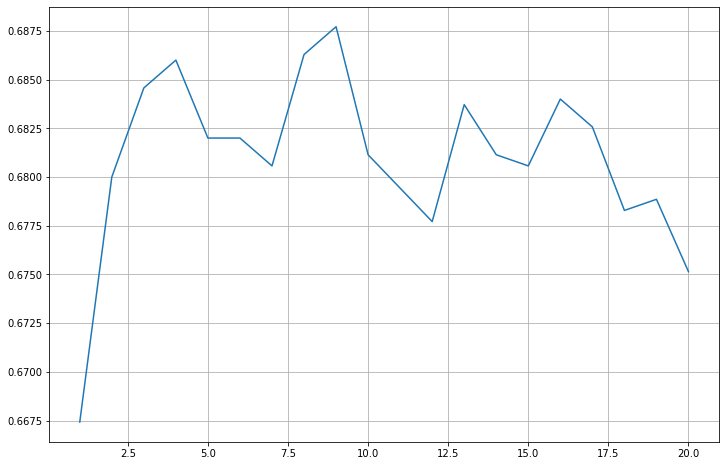

In [35]:
result2 = pd.DataFrame(model_rf2.cv_results_)
temp2 = result2.loc[:, ['param_max_features', 'mean_test_score']]

plt.figure(figsize=(12,8))
plt.plot('param_max_features', 'mean_test_score', data=temp2)
plt.grid()
plt.show()

* 변수 중요도

### (3) n_estimators와 max_features를 한꺼번에 튜닝

In [48]:
params3 = {'n_estimators' : range(5,201,5), 'max_features': range(1,mSize+1)}
model3 = RandomForestClassifier()
model_rf3 = GridSearchCV(model3, params3, cv=10, verbose=3)

In [49]:
model_rf3.fit(x_train, y_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
[CV 1/10] END ...max_features=1, n_estimators=5;, score=0.560 total time=   0.0s
[CV 2/10] END ...max_features=1, n_estimators=5;, score=0.626 total time=   0.0s
[CV 3/10] END ...max_features=1, n_estimators=5;, score=0.629 total time=   0.0s
[CV 4/10] END ...max_features=1, n_estimators=5;, score=0.626 total time=   0.0s
[CV 5/10] END ...max_features=1, n_estimators=5;, score=0.623 total time=   0.0s
[CV 6/10] END ...max_features=1, n_estimators=5;, score=0.603 total time=   0.0s
[CV 7/10] END ...max_features=1, n_estimators=5;, score=0.597 total time=   0.0s
[CV 8/10] END ...max_features=1, n_estimators=5;, score=0.623 total time=   0.0s
[CV 9/10] END ...max_features=1, n_estimators=5;, score=0.640 total time=   0.0s
[CV 10/10] END ..max_features=1, n_estimators=5;, score=0.634 total time=   0.0s
[CV 1/10] END ..max_features=1, n_estimators=10;, score=0.637 total time=   0.0s
[CV 2/10] END ..max_features=1, n_estimators

[CV 2/10] END ..max_features=1, n_estimators=55;, score=0.629 total time=   0.1s
[CV 3/10] END ..max_features=1, n_estimators=55;, score=0.666 total time=   0.1s
[CV 4/10] END ..max_features=1, n_estimators=55;, score=0.674 total time=   0.1s
[CV 5/10] END ..max_features=1, n_estimators=55;, score=0.660 total time=   0.1s
[CV 6/10] END ..max_features=1, n_estimators=55;, score=0.649 total time=   0.1s
[CV 7/10] END ..max_features=1, n_estimators=55;, score=0.666 total time=   0.1s
[CV 8/10] END ..max_features=1, n_estimators=55;, score=0.677 total time=   0.1s
[CV 9/10] END ..max_features=1, n_estimators=55;, score=0.700 total time=   0.1s
[CV 10/10] END .max_features=1, n_estimators=55;, score=0.649 total time=   0.1s
[CV 1/10] END ..max_features=1, n_estimators=60;, score=0.643 total time=   0.1s
[CV 2/10] END ..max_features=1, n_estimators=60;, score=0.626 total time=   0.1s
[CV 3/10] END ..max_features=1, n_estimators=60;, score=0.694 total time=   0.1s
[CV 4/10] END ..max_features

[CV 4/10] END .max_features=1, n_estimators=105;, score=0.671 total time=   0.2s
[CV 5/10] END .max_features=1, n_estimators=105;, score=0.640 total time=   0.2s
[CV 6/10] END .max_features=1, n_estimators=105;, score=0.649 total time=   0.2s
[CV 7/10] END .max_features=1, n_estimators=105;, score=0.649 total time=   0.2s
[CV 8/10] END .max_features=1, n_estimators=105;, score=0.680 total time=   0.2s
[CV 9/10] END .max_features=1, n_estimators=105;, score=0.703 total time=   0.2s
[CV 10/10] END max_features=1, n_estimators=105;, score=0.671 total time=   0.2s
[CV 1/10] END .max_features=1, n_estimators=110;, score=0.666 total time=   0.2s
[CV 2/10] END .max_features=1, n_estimators=110;, score=0.649 total time=   0.2s
[CV 3/10] END .max_features=1, n_estimators=110;, score=0.683 total time=   0.2s
[CV 4/10] END .max_features=1, n_estimators=110;, score=0.706 total time=   0.2s
[CV 5/10] END .max_features=1, n_estimators=110;, score=0.680 total time=   0.2s
[CV 6/10] END .max_features=

[CV 6/10] END .max_features=1, n_estimators=155;, score=0.646 total time=   0.5s
[CV 7/10] END .max_features=1, n_estimators=155;, score=0.649 total time=   0.5s
[CV 8/10] END .max_features=1, n_estimators=155;, score=0.683 total time=   0.5s
[CV 9/10] END .max_features=1, n_estimators=155;, score=0.694 total time=   0.4s
[CV 10/10] END max_features=1, n_estimators=155;, score=0.654 total time=   0.5s
[CV 1/10] END .max_features=1, n_estimators=160;, score=0.657 total time=   0.4s
[CV 2/10] END .max_features=1, n_estimators=160;, score=0.663 total time=   0.4s
[CV 3/10] END .max_features=1, n_estimators=160;, score=0.689 total time=   0.4s
[CV 4/10] END .max_features=1, n_estimators=160;, score=0.680 total time=   0.5s
[CV 5/10] END .max_features=1, n_estimators=160;, score=0.657 total time=   0.5s
[CV 6/10] END .max_features=1, n_estimators=160;, score=0.626 total time=   0.6s
[CV 7/10] END .max_features=1, n_estimators=160;, score=0.654 total time=   0.6s
[CV 8/10] END .max_features=

[CV 10/10] END ..max_features=2, n_estimators=5;, score=0.597 total time=   0.0s
[CV 1/10] END ..max_features=2, n_estimators=10;, score=0.651 total time=   0.0s
[CV 2/10] END ..max_features=2, n_estimators=10;, score=0.606 total time=   0.0s
[CV 3/10] END ..max_features=2, n_estimators=10;, score=0.609 total time=   0.0s
[CV 4/10] END ..max_features=2, n_estimators=10;, score=0.609 total time=   0.0s
[CV 5/10] END ..max_features=2, n_estimators=10;, score=0.634 total time=   0.0s
[CV 6/10] END ..max_features=2, n_estimators=10;, score=0.623 total time=   0.0s
[CV 7/10] END ..max_features=2, n_estimators=10;, score=0.631 total time=   0.0s
[CV 8/10] END ..max_features=2, n_estimators=10;, score=0.631 total time=   0.0s
[CV 9/10] END ..max_features=2, n_estimators=10;, score=0.666 total time=   0.0s
[CV 10/10] END .max_features=2, n_estimators=10;, score=0.649 total time=   0.0s
[CV 1/10] END ..max_features=2, n_estimators=15;, score=0.643 total time=   0.0s
[CV 2/10] END ..max_features

[CV 3/10] END ..max_features=2, n_estimators=60;, score=0.677 total time=   0.1s
[CV 4/10] END ..max_features=2, n_estimators=60;, score=0.706 total time=   0.1s
[CV 5/10] END ..max_features=2, n_estimators=60;, score=0.683 total time=   0.1s
[CV 6/10] END ..max_features=2, n_estimators=60;, score=0.634 total time=   0.1s
[CV 7/10] END ..max_features=2, n_estimators=60;, score=0.637 total time=   0.1s
[CV 8/10] END ..max_features=2, n_estimators=60;, score=0.694 total time=   0.1s
[CV 9/10] END ..max_features=2, n_estimators=60;, score=0.706 total time=   0.1s
[CV 10/10] END .max_features=2, n_estimators=60;, score=0.677 total time=   0.1s
[CV 1/10] END ..max_features=2, n_estimators=65;, score=0.671 total time=   0.1s
[CV 2/10] END ..max_features=2, n_estimators=65;, score=0.646 total time=   0.2s
[CV 3/10] END ..max_features=2, n_estimators=65;, score=0.691 total time=   0.1s
[CV 4/10] END ..max_features=2, n_estimators=65;, score=0.686 total time=   0.2s
[CV 5/10] END ..max_features

[CV 5/10] END .max_features=2, n_estimators=110;, score=0.674 total time=   0.3s
[CV 6/10] END .max_features=2, n_estimators=110;, score=0.634 total time=   0.3s
[CV 7/10] END .max_features=2, n_estimators=110;, score=0.637 total time=   0.3s
[CV 8/10] END .max_features=2, n_estimators=110;, score=0.677 total time=   0.3s
[CV 9/10] END .max_features=2, n_estimators=110;, score=0.714 total time=   0.3s
[CV 10/10] END max_features=2, n_estimators=110;, score=0.686 total time=   0.3s
[CV 1/10] END .max_features=2, n_estimators=115;, score=0.674 total time=   0.3s
[CV 2/10] END .max_features=2, n_estimators=115;, score=0.646 total time=   0.3s
[CV 3/10] END .max_features=2, n_estimators=115;, score=0.703 total time=   0.3s
[CV 4/10] END .max_features=2, n_estimators=115;, score=0.726 total time=   0.3s
[CV 5/10] END .max_features=2, n_estimators=115;, score=0.694 total time=   0.3s
[CV 6/10] END .max_features=2, n_estimators=115;, score=0.637 total time=   0.3s
[CV 7/10] END .max_features=

[CV 7/10] END .max_features=2, n_estimators=160;, score=0.671 total time=   0.4s
[CV 8/10] END .max_features=2, n_estimators=160;, score=0.694 total time=   0.4s
[CV 9/10] END .max_features=2, n_estimators=160;, score=0.694 total time=   0.4s
[CV 10/10] END max_features=2, n_estimators=160;, score=0.671 total time=   0.4s
[CV 1/10] END .max_features=2, n_estimators=165;, score=0.674 total time=   0.4s
[CV 2/10] END .max_features=2, n_estimators=165;, score=0.646 total time=   0.5s
[CV 3/10] END .max_features=2, n_estimators=165;, score=0.723 total time=   0.5s
[CV 4/10] END .max_features=2, n_estimators=165;, score=0.709 total time=   0.4s
[CV 5/10] END .max_features=2, n_estimators=165;, score=0.683 total time=   0.4s
[CV 6/10] END .max_features=2, n_estimators=165;, score=0.640 total time=   0.4s
[CV 7/10] END .max_features=2, n_estimators=165;, score=0.654 total time=   0.4s
[CV 8/10] END .max_features=2, n_estimators=165;, score=0.697 total time=   0.4s
[CV 9/10] END .max_features=

[CV 10/10] END .max_features=3, n_estimators=10;, score=0.646 total time=   0.0s
[CV 1/10] END ..max_features=3, n_estimators=15;, score=0.643 total time=   0.0s
[CV 2/10] END ..max_features=3, n_estimators=15;, score=0.629 total time=   0.0s
[CV 3/10] END ..max_features=3, n_estimators=15;, score=0.654 total time=   0.0s
[CV 4/10] END ..max_features=3, n_estimators=15;, score=0.649 total time=   0.0s
[CV 5/10] END ..max_features=3, n_estimators=15;, score=0.640 total time=   0.0s
[CV 6/10] END ..max_features=3, n_estimators=15;, score=0.651 total time=   0.0s
[CV 7/10] END ..max_features=3, n_estimators=15;, score=0.703 total time=   0.0s
[CV 8/10] END ..max_features=3, n_estimators=15;, score=0.680 total time=   0.0s
[CV 9/10] END ..max_features=3, n_estimators=15;, score=0.694 total time=   0.0s
[CV 10/10] END .max_features=3, n_estimators=15;, score=0.654 total time=   0.0s
[CV 1/10] END ..max_features=3, n_estimators=20;, score=0.654 total time=   0.0s
[CV 2/10] END ..max_features

[CV 2/10] END ..max_features=3, n_estimators=65;, score=0.649 total time=   0.1s
[CV 3/10] END ..max_features=3, n_estimators=65;, score=0.729 total time=   0.2s
[CV 4/10] END ..max_features=3, n_estimators=65;, score=0.720 total time=   0.1s
[CV 5/10] END ..max_features=3, n_estimators=65;, score=0.660 total time=   0.1s
[CV 6/10] END ..max_features=3, n_estimators=65;, score=0.649 total time=   0.1s
[CV 7/10] END ..max_features=3, n_estimators=65;, score=0.689 total time=   0.1s
[CV 8/10] END ..max_features=3, n_estimators=65;, score=0.689 total time=   0.1s
[CV 9/10] END ..max_features=3, n_estimators=65;, score=0.740 total time=   0.2s
[CV 10/10] END .max_features=3, n_estimators=65;, score=0.666 total time=   0.1s
[CV 1/10] END ..max_features=3, n_estimators=70;, score=0.666 total time=   0.2s
[CV 2/10] END ..max_features=3, n_estimators=70;, score=0.651 total time=   0.2s
[CV 3/10] END ..max_features=3, n_estimators=70;, score=0.706 total time=   0.2s
[CV 4/10] END ..max_features

[CV 4/10] END .max_features=3, n_estimators=115;, score=0.743 total time=   0.3s
[CV 5/10] END .max_features=3, n_estimators=115;, score=0.689 total time=   0.3s
[CV 6/10] END .max_features=3, n_estimators=115;, score=0.657 total time=   0.3s
[CV 7/10] END .max_features=3, n_estimators=115;, score=0.666 total time=   0.3s
[CV 8/10] END .max_features=3, n_estimators=115;, score=0.691 total time=   0.3s
[CV 9/10] END .max_features=3, n_estimators=115;, score=0.711 total time=   0.3s
[CV 10/10] END max_features=3, n_estimators=115;, score=0.694 total time=   0.3s
[CV 1/10] END .max_features=3, n_estimators=120;, score=0.674 total time=   0.3s
[CV 2/10] END .max_features=3, n_estimators=120;, score=0.646 total time=   0.4s
[CV 3/10] END .max_features=3, n_estimators=120;, score=0.706 total time=   0.3s
[CV 4/10] END .max_features=3, n_estimators=120;, score=0.697 total time=   0.3s
[CV 5/10] END .max_features=3, n_estimators=120;, score=0.689 total time=   0.3s
[CV 6/10] END .max_features=

[CV 6/10] END .max_features=3, n_estimators=165;, score=0.666 total time=   0.6s
[CV 7/10] END .max_features=3, n_estimators=165;, score=0.651 total time=   0.6s
[CV 8/10] END .max_features=3, n_estimators=165;, score=0.706 total time=   0.5s
[CV 9/10] END .max_features=3, n_estimators=165;, score=0.723 total time=   0.6s
[CV 10/10] END max_features=3, n_estimators=165;, score=0.689 total time=   0.5s
[CV 1/10] END .max_features=3, n_estimators=170;, score=0.654 total time=   0.6s
[CV 2/10] END .max_features=3, n_estimators=170;, score=0.640 total time=   0.6s
[CV 3/10] END .max_features=3, n_estimators=170;, score=0.711 total time=   0.6s
[CV 4/10] END .max_features=3, n_estimators=170;, score=0.740 total time=   0.6s
[CV 5/10] END .max_features=3, n_estimators=170;, score=0.694 total time=   0.5s
[CV 6/10] END .max_features=3, n_estimators=170;, score=0.663 total time=   0.5s
[CV 7/10] END .max_features=3, n_estimators=170;, score=0.660 total time=   0.6s
[CV 8/10] END .max_features=

[CV 1/10] END ..max_features=4, n_estimators=20;, score=0.651 total time=   0.0s
[CV 2/10] END ..max_features=4, n_estimators=20;, score=0.620 total time=   0.0s
[CV 3/10] END ..max_features=4, n_estimators=20;, score=0.686 total time=   0.0s
[CV 4/10] END ..max_features=4, n_estimators=20;, score=0.706 total time=   0.0s
[CV 5/10] END ..max_features=4, n_estimators=20;, score=0.663 total time=   0.0s
[CV 6/10] END ..max_features=4, n_estimators=20;, score=0.620 total time=   0.0s
[CV 7/10] END ..max_features=4, n_estimators=20;, score=0.654 total time=   0.0s
[CV 8/10] END ..max_features=4, n_estimators=20;, score=0.657 total time=   0.0s
[CV 9/10] END ..max_features=4, n_estimators=20;, score=0.703 total time=   0.0s
[CV 10/10] END .max_features=4, n_estimators=20;, score=0.643 total time=   0.0s
[CV 1/10] END ..max_features=4, n_estimators=25;, score=0.657 total time=   0.0s
[CV 2/10] END ..max_features=4, n_estimators=25;, score=0.623 total time=   0.0s
[CV 3/10] END ..max_features

[CV 3/10] END ..max_features=4, n_estimators=70;, score=0.717 total time=   0.2s
[CV 4/10] END ..max_features=4, n_estimators=70;, score=0.689 total time=   0.2s
[CV 5/10] END ..max_features=4, n_estimators=70;, score=0.689 total time=   0.2s
[CV 6/10] END ..max_features=4, n_estimators=70;, score=0.646 total time=   0.2s
[CV 7/10] END ..max_features=4, n_estimators=70;, score=0.643 total time=   0.2s
[CV 8/10] END ..max_features=4, n_estimators=70;, score=0.700 total time=   0.2s
[CV 9/10] END ..max_features=4, n_estimators=70;, score=0.723 total time=   0.2s
[CV 10/10] END .max_features=4, n_estimators=70;, score=0.660 total time=   0.2s
[CV 1/10] END ..max_features=4, n_estimators=75;, score=0.657 total time=   0.2s
[CV 2/10] END ..max_features=4, n_estimators=75;, score=0.646 total time=   0.2s
[CV 3/10] END ..max_features=4, n_estimators=75;, score=0.714 total time=   0.2s
[CV 4/10] END ..max_features=4, n_estimators=75;, score=0.700 total time=   0.2s
[CV 5/10] END ..max_features

[CV 5/10] END .max_features=4, n_estimators=120;, score=0.691 total time=   0.4s
[CV 6/10] END .max_features=4, n_estimators=120;, score=0.657 total time=   0.4s
[CV 7/10] END .max_features=4, n_estimators=120;, score=0.663 total time=   0.4s
[CV 8/10] END .max_features=4, n_estimators=120;, score=0.709 total time=   0.4s
[CV 9/10] END .max_features=4, n_estimators=120;, score=0.737 total time=   0.4s
[CV 10/10] END max_features=4, n_estimators=120;, score=0.666 total time=   0.5s
[CV 1/10] END .max_features=4, n_estimators=125;, score=0.689 total time=   0.5s
[CV 2/10] END .max_features=4, n_estimators=125;, score=0.666 total time=   0.5s
[CV 3/10] END .max_features=4, n_estimators=125;, score=0.720 total time=   0.5s
[CV 4/10] END .max_features=4, n_estimators=125;, score=0.711 total time=   0.5s
[CV 5/10] END .max_features=4, n_estimators=125;, score=0.706 total time=   0.5s
[CV 6/10] END .max_features=4, n_estimators=125;, score=0.666 total time=   0.4s
[CV 7/10] END .max_features=

[CV 7/10] END .max_features=4, n_estimators=170;, score=0.671 total time=   0.6s
[CV 8/10] END .max_features=4, n_estimators=170;, score=0.706 total time=   0.6s
[CV 9/10] END .max_features=4, n_estimators=170;, score=0.749 total time=   0.6s
[CV 10/10] END max_features=4, n_estimators=170;, score=0.671 total time=   0.6s
[CV 1/10] END .max_features=4, n_estimators=175;, score=0.663 total time=   0.6s
[CV 2/10] END .max_features=4, n_estimators=175;, score=0.657 total time=   0.7s
[CV 3/10] END .max_features=4, n_estimators=175;, score=0.729 total time=   0.7s
[CV 4/10] END .max_features=4, n_estimators=175;, score=0.697 total time=   0.7s
[CV 5/10] END .max_features=4, n_estimators=175;, score=0.666 total time=   0.6s
[CV 6/10] END .max_features=4, n_estimators=175;, score=0.657 total time=   0.7s
[CV 7/10] END .max_features=4, n_estimators=175;, score=0.671 total time=   0.6s
[CV 8/10] END .max_features=4, n_estimators=175;, score=0.689 total time=   0.7s
[CV 9/10] END .max_features=

[CV 9/10] END ..max_features=5, n_estimators=20;, score=0.709 total time=   0.0s
[CV 10/10] END .max_features=5, n_estimators=20;, score=0.669 total time=   0.0s
[CV 1/10] END ..max_features=5, n_estimators=25;, score=0.646 total time=   0.0s
[CV 2/10] END ..max_features=5, n_estimators=25;, score=0.634 total time=   0.0s
[CV 3/10] END ..max_features=5, n_estimators=25;, score=0.703 total time=   0.0s
[CV 4/10] END ..max_features=5, n_estimators=25;, score=0.723 total time=   0.0s
[CV 5/10] END ..max_features=5, n_estimators=25;, score=0.686 total time=   0.0s
[CV 6/10] END ..max_features=5, n_estimators=25;, score=0.657 total time=   0.0s
[CV 7/10] END ..max_features=5, n_estimators=25;, score=0.654 total time=   0.0s
[CV 8/10] END ..max_features=5, n_estimators=25;, score=0.694 total time=   0.0s
[CV 9/10] END ..max_features=5, n_estimators=25;, score=0.703 total time=   0.0s
[CV 10/10] END .max_features=5, n_estimators=25;, score=0.646 total time=   0.0s
[CV 1/10] END ..max_features

[CV 1/10] END ..max_features=5, n_estimators=75;, score=0.677 total time=   0.3s
[CV 2/10] END ..max_features=5, n_estimators=75;, score=0.643 total time=   0.3s
[CV 3/10] END ..max_features=5, n_estimators=75;, score=0.706 total time=   0.3s
[CV 4/10] END ..max_features=5, n_estimators=75;, score=0.723 total time=   0.3s
[CV 5/10] END ..max_features=5, n_estimators=75;, score=0.677 total time=   0.2s
[CV 6/10] END ..max_features=5, n_estimators=75;, score=0.651 total time=   0.3s
[CV 7/10] END ..max_features=5, n_estimators=75;, score=0.640 total time=   0.2s
[CV 8/10] END ..max_features=5, n_estimators=75;, score=0.714 total time=   0.2s
[CV 9/10] END ..max_features=5, n_estimators=75;, score=0.709 total time=   0.3s
[CV 10/10] END .max_features=5, n_estimators=75;, score=0.666 total time=   0.3s
[CV 1/10] END ..max_features=5, n_estimators=80;, score=0.666 total time=   0.3s
[CV 2/10] END ..max_features=5, n_estimators=80;, score=0.649 total time=   0.3s
[CV 3/10] END ..max_features

[CV 3/10] END .max_features=5, n_estimators=125;, score=0.700 total time=   0.5s
[CV 4/10] END .max_features=5, n_estimators=125;, score=0.720 total time=   0.5s
[CV 5/10] END .max_features=5, n_estimators=125;, score=0.674 total time=   0.5s
[CV 6/10] END .max_features=5, n_estimators=125;, score=0.651 total time=   0.5s
[CV 7/10] END .max_features=5, n_estimators=125;, score=0.669 total time=   0.5s
[CV 8/10] END .max_features=5, n_estimators=125;, score=0.700 total time=   0.5s
[CV 9/10] END .max_features=5, n_estimators=125;, score=0.726 total time=   0.5s
[CV 10/10] END max_features=5, n_estimators=125;, score=0.683 total time=   0.5s
[CV 1/10] END .max_features=5, n_estimators=130;, score=0.654 total time=   0.5s
[CV 2/10] END .max_features=5, n_estimators=130;, score=0.663 total time=   0.5s
[CV 3/10] END .max_features=5, n_estimators=130;, score=0.729 total time=   0.5s
[CV 4/10] END .max_features=5, n_estimators=130;, score=0.720 total time=   0.5s
[CV 5/10] END .max_features=

[CV 5/10] END .max_features=5, n_estimators=175;, score=0.694 total time=   0.7s
[CV 6/10] END .max_features=5, n_estimators=175;, score=0.660 total time=   0.7s
[CV 7/10] END .max_features=5, n_estimators=175;, score=0.663 total time=   0.7s
[CV 8/10] END .max_features=5, n_estimators=175;, score=0.709 total time=   0.7s
[CV 9/10] END .max_features=5, n_estimators=175;, score=0.720 total time=   0.7s
[CV 10/10] END max_features=5, n_estimators=175;, score=0.666 total time=   0.7s
[CV 1/10] END .max_features=5, n_estimators=180;, score=0.651 total time=   0.8s
[CV 2/10] END .max_features=5, n_estimators=180;, score=0.660 total time=   0.8s
[CV 3/10] END .max_features=5, n_estimators=180;, score=0.717 total time=   0.8s
[CV 4/10] END .max_features=5, n_estimators=180;, score=0.731 total time=   0.7s
[CV 5/10] END .max_features=5, n_estimators=180;, score=0.694 total time=   0.7s
[CV 6/10] END .max_features=5, n_estimators=180;, score=0.649 total time=   0.8s
[CV 7/10] END .max_features=

[CV 8/10] END ..max_features=6, n_estimators=25;, score=0.691 total time=   0.0s
[CV 9/10] END ..max_features=6, n_estimators=25;, score=0.686 total time=   0.0s
[CV 10/10] END .max_features=6, n_estimators=25;, score=0.657 total time=   0.0s
[CV 1/10] END ..max_features=6, n_estimators=30;, score=0.683 total time=   0.1s
[CV 2/10] END ..max_features=6, n_estimators=30;, score=0.651 total time=   0.1s
[CV 3/10] END ..max_features=6, n_estimators=30;, score=0.697 total time=   0.1s
[CV 4/10] END ..max_features=6, n_estimators=30;, score=0.711 total time=   0.1s
[CV 5/10] END ..max_features=6, n_estimators=30;, score=0.680 total time=   0.1s
[CV 6/10] END ..max_features=6, n_estimators=30;, score=0.666 total time=   0.1s
[CV 7/10] END ..max_features=6, n_estimators=30;, score=0.651 total time=   0.1s
[CV 8/10] END ..max_features=6, n_estimators=30;, score=0.711 total time=   0.1s
[CV 9/10] END ..max_features=6, n_estimators=30;, score=0.700 total time=   0.1s
[CV 10/10] END .max_features

[CV 10/10] END .max_features=6, n_estimators=75;, score=0.657 total time=   0.3s
[CV 1/10] END ..max_features=6, n_estimators=80;, score=0.646 total time=   0.3s
[CV 2/10] END ..max_features=6, n_estimators=80;, score=0.663 total time=   0.3s
[CV 3/10] END ..max_features=6, n_estimators=80;, score=0.700 total time=   0.3s
[CV 4/10] END ..max_features=6, n_estimators=80;, score=0.723 total time=   0.3s
[CV 5/10] END ..max_features=6, n_estimators=80;, score=0.686 total time=   0.4s
[CV 6/10] END ..max_features=6, n_estimators=80;, score=0.660 total time=   0.4s
[CV 7/10] END ..max_features=6, n_estimators=80;, score=0.666 total time=   0.3s
[CV 8/10] END ..max_features=6, n_estimators=80;, score=0.700 total time=   0.4s
[CV 9/10] END ..max_features=6, n_estimators=80;, score=0.717 total time=   0.4s
[CV 10/10] END .max_features=6, n_estimators=80;, score=0.663 total time=   0.4s
[CV 1/10] END ..max_features=6, n_estimators=85;, score=0.677 total time=   0.4s
[CV 2/10] END ..max_features

[CV 2/10] END .max_features=6, n_estimators=130;, score=0.654 total time=   0.6s
[CV 3/10] END .max_features=6, n_estimators=130;, score=0.729 total time=   0.6s
[CV 4/10] END .max_features=6, n_estimators=130;, score=0.706 total time=   0.6s
[CV 5/10] END .max_features=6, n_estimators=130;, score=0.669 total time=   0.6s
[CV 6/10] END .max_features=6, n_estimators=130;, score=0.654 total time=   0.6s
[CV 7/10] END .max_features=6, n_estimators=130;, score=0.651 total time=   0.6s
[CV 8/10] END .max_features=6, n_estimators=130;, score=0.694 total time=   0.6s
[CV 9/10] END .max_features=6, n_estimators=130;, score=0.711 total time=   0.6s
[CV 10/10] END max_features=6, n_estimators=130;, score=0.671 total time=   0.6s
[CV 1/10] END .max_features=6, n_estimators=135;, score=0.663 total time=   0.6s
[CV 2/10] END .max_features=6, n_estimators=135;, score=0.654 total time=   0.6s
[CV 3/10] END .max_features=6, n_estimators=135;, score=0.726 total time=   0.6s
[CV 4/10] END .max_features=

[CV 4/10] END .max_features=6, n_estimators=180;, score=0.726 total time=   0.8s
[CV 5/10] END .max_features=6, n_estimators=180;, score=0.683 total time=   0.8s
[CV 6/10] END .max_features=6, n_estimators=180;, score=0.660 total time=   0.8s
[CV 7/10] END .max_features=6, n_estimators=180;, score=0.651 total time=   0.8s
[CV 8/10] END .max_features=6, n_estimators=180;, score=0.694 total time=   0.8s
[CV 9/10] END .max_features=6, n_estimators=180;, score=0.723 total time=   0.8s
[CV 10/10] END max_features=6, n_estimators=180;, score=0.669 total time=   0.8s
[CV 1/10] END .max_features=6, n_estimators=185;, score=0.666 total time=   0.8s
[CV 2/10] END .max_features=6, n_estimators=185;, score=0.643 total time=   0.8s
[CV 3/10] END .max_features=6, n_estimators=185;, score=0.731 total time=   0.8s
[CV 4/10] END .max_features=6, n_estimators=185;, score=0.723 total time=   0.9s
[CV 5/10] END .max_features=6, n_estimators=185;, score=0.689 total time=   0.9s
[CV 6/10] END .max_features=

[CV 7/10] END ..max_features=7, n_estimators=30;, score=0.654 total time=   0.1s
[CV 8/10] END ..max_features=7, n_estimators=30;, score=0.703 total time=   0.1s
[CV 9/10] END ..max_features=7, n_estimators=30;, score=0.709 total time=   0.1s
[CV 10/10] END .max_features=7, n_estimators=30;, score=0.689 total time=   0.1s
[CV 1/10] END ..max_features=7, n_estimators=35;, score=0.674 total time=   0.1s
[CV 2/10] END ..max_features=7, n_estimators=35;, score=0.617 total time=   0.1s
[CV 3/10] END ..max_features=7, n_estimators=35;, score=0.689 total time=   0.1s
[CV 4/10] END ..max_features=7, n_estimators=35;, score=0.720 total time=   0.1s
[CV 5/10] END ..max_features=7, n_estimators=35;, score=0.700 total time=   0.1s
[CV 6/10] END ..max_features=7, n_estimators=35;, score=0.649 total time=   0.1s
[CV 7/10] END ..max_features=7, n_estimators=35;, score=0.634 total time=   0.1s
[CV 8/10] END ..max_features=7, n_estimators=35;, score=0.700 total time=   0.1s
[CV 9/10] END ..max_features

[CV 9/10] END ..max_features=7, n_estimators=80;, score=0.720 total time=   0.4s
[CV 10/10] END .max_features=7, n_estimators=80;, score=0.654 total time=   0.4s
[CV 1/10] END ..max_features=7, n_estimators=85;, score=0.660 total time=   0.4s
[CV 2/10] END ..max_features=7, n_estimators=85;, score=0.657 total time=   0.4s
[CV 3/10] END ..max_features=7, n_estimators=85;, score=0.709 total time=   0.4s
[CV 4/10] END ..max_features=7, n_estimators=85;, score=0.737 total time=   0.4s
[CV 5/10] END ..max_features=7, n_estimators=85;, score=0.697 total time=   0.4s
[CV 6/10] END ..max_features=7, n_estimators=85;, score=0.657 total time=   0.4s
[CV 7/10] END ..max_features=7, n_estimators=85;, score=0.626 total time=   0.4s
[CV 8/10] END ..max_features=7, n_estimators=85;, score=0.700 total time=   0.4s
[CV 9/10] END ..max_features=7, n_estimators=85;, score=0.726 total time=   0.4s
[CV 10/10] END .max_features=7, n_estimators=85;, score=0.657 total time=   0.4s
[CV 1/10] END ..max_features

[CV 1/10] END .max_features=7, n_estimators=135;, score=0.660 total time=   0.6s
[CV 2/10] END .max_features=7, n_estimators=135;, score=0.654 total time=   0.6s
[CV 3/10] END .max_features=7, n_estimators=135;, score=0.700 total time=   0.7s
[CV 4/10] END .max_features=7, n_estimators=135;, score=0.737 total time=   0.7s
[CV 5/10] END .max_features=7, n_estimators=135;, score=0.683 total time=   0.7s
[CV 6/10] END .max_features=7, n_estimators=135;, score=0.674 total time=   0.7s
[CV 7/10] END .max_features=7, n_estimators=135;, score=0.663 total time=   0.7s
[CV 8/10] END .max_features=7, n_estimators=135;, score=0.689 total time=   0.7s
[CV 9/10] END .max_features=7, n_estimators=135;, score=0.729 total time=   0.7s
[CV 10/10] END max_features=7, n_estimators=135;, score=0.666 total time=   0.7s
[CV 1/10] END .max_features=7, n_estimators=140;, score=0.640 total time=   0.7s
[CV 2/10] END .max_features=7, n_estimators=140;, score=0.651 total time=   0.7s
[CV 3/10] END .max_features=

[CV 3/10] END .max_features=7, n_estimators=185;, score=0.720 total time=   0.9s
[CV 4/10] END .max_features=7, n_estimators=185;, score=0.740 total time=   0.9s
[CV 5/10] END .max_features=7, n_estimators=185;, score=0.709 total time=   0.9s
[CV 6/10] END .max_features=7, n_estimators=185;, score=0.666 total time=   1.0s
[CV 7/10] END .max_features=7, n_estimators=185;, score=0.660 total time=   1.0s
[CV 8/10] END .max_features=7, n_estimators=185;, score=0.697 total time=   1.0s
[CV 9/10] END .max_features=7, n_estimators=185;, score=0.717 total time=   1.0s
[CV 10/10] END max_features=7, n_estimators=185;, score=0.680 total time=   0.9s
[CV 1/10] END .max_features=7, n_estimators=190;, score=0.666 total time=   1.0s
[CV 2/10] END .max_features=7, n_estimators=190;, score=0.660 total time=   1.0s
[CV 3/10] END .max_features=7, n_estimators=190;, score=0.720 total time=   1.0s
[CV 4/10] END .max_features=7, n_estimators=190;, score=0.737 total time=   1.0s
[CV 5/10] END .max_features=

[CV 5/10] END ..max_features=8, n_estimators=35;, score=0.689 total time=   0.1s
[CV 6/10] END ..max_features=8, n_estimators=35;, score=0.657 total time=   0.1s
[CV 7/10] END ..max_features=8, n_estimators=35;, score=0.643 total time=   0.1s
[CV 8/10] END ..max_features=8, n_estimators=35;, score=0.697 total time=   0.1s
[CV 9/10] END ..max_features=8, n_estimators=35;, score=0.714 total time=   0.1s
[CV 10/10] END .max_features=8, n_estimators=35;, score=0.660 total time=   0.1s
[CV 1/10] END ..max_features=8, n_estimators=40;, score=0.671 total time=   0.2s
[CV 2/10] END ..max_features=8, n_estimators=40;, score=0.649 total time=   0.2s
[CV 3/10] END ..max_features=8, n_estimators=40;, score=0.720 total time=   0.2s
[CV 4/10] END ..max_features=8, n_estimators=40;, score=0.726 total time=   0.2s
[CV 5/10] END ..max_features=8, n_estimators=40;, score=0.663 total time=   0.2s
[CV 6/10] END ..max_features=8, n_estimators=40;, score=0.677 total time=   0.2s
[CV 7/10] END ..max_features

[CV 7/10] END ..max_features=8, n_estimators=85;, score=0.666 total time=   0.4s
[CV 8/10] END ..max_features=8, n_estimators=85;, score=0.709 total time=   0.4s
[CV 9/10] END ..max_features=8, n_estimators=85;, score=0.711 total time=   0.4s
[CV 10/10] END .max_features=8, n_estimators=85;, score=0.649 total time=   0.4s
[CV 1/10] END ..max_features=8, n_estimators=90;, score=0.657 total time=   0.4s
[CV 2/10] END ..max_features=8, n_estimators=90;, score=0.634 total time=   0.4s
[CV 3/10] END ..max_features=8, n_estimators=90;, score=0.711 total time=   0.4s
[CV 4/10] END ..max_features=8, n_estimators=90;, score=0.734 total time=   0.4s
[CV 5/10] END ..max_features=8, n_estimators=90;, score=0.674 total time=   0.4s
[CV 6/10] END ..max_features=8, n_estimators=90;, score=0.646 total time=   0.4s
[CV 7/10] END ..max_features=8, n_estimators=90;, score=0.651 total time=   0.4s
[CV 8/10] END ..max_features=8, n_estimators=90;, score=0.697 total time=   0.4s
[CV 9/10] END ..max_features

[CV 9/10] END .max_features=8, n_estimators=135;, score=0.734 total time=   0.7s
[CV 10/10] END max_features=8, n_estimators=135;, score=0.657 total time=   0.7s
[CV 1/10] END .max_features=8, n_estimators=140;, score=0.666 total time=   0.7s
[CV 2/10] END .max_features=8, n_estimators=140;, score=0.657 total time=   0.7s
[CV 3/10] END .max_features=8, n_estimators=140;, score=0.740 total time=   0.7s
[CV 4/10] END .max_features=8, n_estimators=140;, score=0.734 total time=   0.8s
[CV 5/10] END .max_features=8, n_estimators=140;, score=0.674 total time=   0.8s
[CV 6/10] END .max_features=8, n_estimators=140;, score=0.660 total time=   0.8s
[CV 7/10] END .max_features=8, n_estimators=140;, score=0.651 total time=   0.8s
[CV 8/10] END .max_features=8, n_estimators=140;, score=0.700 total time=   0.8s
[CV 9/10] END .max_features=8, n_estimators=140;, score=0.729 total time=   0.7s
[CV 10/10] END max_features=8, n_estimators=140;, score=0.680 total time=   0.7s
[CV 1/10] END .max_features=

[CV 1/10] END .max_features=8, n_estimators=190;, score=0.657 total time=   1.0s
[CV 2/10] END .max_features=8, n_estimators=190;, score=0.654 total time=   1.0s
[CV 3/10] END .max_features=8, n_estimators=190;, score=0.706 total time=   1.0s
[CV 4/10] END .max_features=8, n_estimators=190;, score=0.731 total time=   1.0s
[CV 5/10] END .max_features=8, n_estimators=190;, score=0.706 total time=   1.0s
[CV 6/10] END .max_features=8, n_estimators=190;, score=0.654 total time=   1.0s
[CV 7/10] END .max_features=8, n_estimators=190;, score=0.669 total time=   1.0s
[CV 8/10] END .max_features=8, n_estimators=190;, score=0.706 total time=   1.0s
[CV 9/10] END .max_features=8, n_estimators=190;, score=0.723 total time=   1.0s
[CV 10/10] END max_features=8, n_estimators=190;, score=0.669 total time=   1.0s
[CV 1/10] END .max_features=8, n_estimators=195;, score=0.663 total time=   1.1s
[CV 2/10] END .max_features=8, n_estimators=195;, score=0.660 total time=   1.0s
[CV 3/10] END .max_features=

[CV 3/10] END ..max_features=9, n_estimators=40;, score=0.706 total time=   0.2s
[CV 4/10] END ..max_features=9, n_estimators=40;, score=0.677 total time=   0.2s
[CV 5/10] END ..max_features=9, n_estimators=40;, score=0.697 total time=   0.2s
[CV 6/10] END ..max_features=9, n_estimators=40;, score=0.637 total time=   0.2s
[CV 7/10] END ..max_features=9, n_estimators=40;, score=0.663 total time=   0.2s
[CV 8/10] END ..max_features=9, n_estimators=40;, score=0.686 total time=   0.2s
[CV 9/10] END ..max_features=9, n_estimators=40;, score=0.703 total time=   0.2s
[CV 10/10] END .max_features=9, n_estimators=40;, score=0.674 total time=   0.2s
[CV 1/10] END ..max_features=9, n_estimators=45;, score=0.660 total time=   0.2s
[CV 2/10] END ..max_features=9, n_estimators=45;, score=0.651 total time=   0.2s
[CV 3/10] END ..max_features=9, n_estimators=45;, score=0.711 total time=   0.2s
[CV 4/10] END ..max_features=9, n_estimators=45;, score=0.723 total time=   0.2s
[CV 5/10] END ..max_features

[CV 5/10] END ..max_features=9, n_estimators=90;, score=0.694 total time=   0.5s
[CV 6/10] END ..max_features=9, n_estimators=90;, score=0.657 total time=   0.5s
[CV 7/10] END ..max_features=9, n_estimators=90;, score=0.657 total time=   0.5s
[CV 8/10] END ..max_features=9, n_estimators=90;, score=0.694 total time=   0.5s
[CV 9/10] END ..max_features=9, n_estimators=90;, score=0.726 total time=   0.5s
[CV 10/10] END .max_features=9, n_estimators=90;, score=0.680 total time=   0.5s
[CV 1/10] END ..max_features=9, n_estimators=95;, score=0.666 total time=   0.5s
[CV 2/10] END ..max_features=9, n_estimators=95;, score=0.663 total time=   0.5s
[CV 3/10] END ..max_features=9, n_estimators=95;, score=0.729 total time=   0.5s
[CV 4/10] END ..max_features=9, n_estimators=95;, score=0.731 total time=   0.5s
[CV 5/10] END ..max_features=9, n_estimators=95;, score=0.706 total time=   0.5s
[CV 6/10] END ..max_features=9, n_estimators=95;, score=0.674 total time=   0.5s
[CV 7/10] END ..max_features

[CV 7/10] END .max_features=9, n_estimators=140;, score=0.666 total time=   0.8s
[CV 8/10] END .max_features=9, n_estimators=140;, score=0.686 total time=   0.8s
[CV 9/10] END .max_features=9, n_estimators=140;, score=0.717 total time=   0.8s
[CV 10/10] END max_features=9, n_estimators=140;, score=0.677 total time=   0.8s
[CV 1/10] END .max_features=9, n_estimators=145;, score=0.669 total time=   0.8s
[CV 2/10] END .max_features=9, n_estimators=145;, score=0.654 total time=   0.8s
[CV 3/10] END .max_features=9, n_estimators=145;, score=0.717 total time=   0.8s
[CV 4/10] END .max_features=9, n_estimators=145;, score=0.737 total time=   0.8s
[CV 5/10] END .max_features=9, n_estimators=145;, score=0.709 total time=   0.8s
[CV 6/10] END .max_features=9, n_estimators=145;, score=0.666 total time=   0.8s
[CV 7/10] END .max_features=9, n_estimators=145;, score=0.643 total time=   0.8s
[CV 8/10] END .max_features=9, n_estimators=145;, score=0.680 total time=   0.8s
[CV 9/10] END .max_features=

[CV 9/10] END .max_features=9, n_estimators=190;, score=0.723 total time=   1.3s
[CV 10/10] END max_features=9, n_estimators=190;, score=0.674 total time=   1.2s
[CV 1/10] END .max_features=9, n_estimators=195;, score=0.666 total time=   1.4s
[CV 2/10] END .max_features=9, n_estimators=195;, score=0.654 total time=   1.3s
[CV 3/10] END .max_features=9, n_estimators=195;, score=0.714 total time=   1.3s
[CV 4/10] END .max_features=9, n_estimators=195;, score=0.734 total time=   1.3s
[CV 5/10] END .max_features=9, n_estimators=195;, score=0.689 total time=   1.3s
[CV 6/10] END .max_features=9, n_estimators=195;, score=0.651 total time=   1.3s
[CV 7/10] END .max_features=9, n_estimators=195;, score=0.651 total time=   1.4s
[CV 8/10] END .max_features=9, n_estimators=195;, score=0.697 total time=   1.5s
[CV 9/10] END .max_features=9, n_estimators=195;, score=0.726 total time=   1.5s
[CV 10/10] END max_features=9, n_estimators=195;, score=0.669 total time=   1.4s
[CV 1/10] END .max_features=

[CV 1/10] END .max_features=10, n_estimators=45;, score=0.683 total time=   0.2s
[CV 2/10] END .max_features=10, n_estimators=45;, score=0.643 total time=   0.2s
[CV 3/10] END .max_features=10, n_estimators=45;, score=0.709 total time=   0.2s
[CV 4/10] END .max_features=10, n_estimators=45;, score=0.723 total time=   0.2s
[CV 5/10] END .max_features=10, n_estimators=45;, score=0.674 total time=   0.2s
[CV 6/10] END .max_features=10, n_estimators=45;, score=0.654 total time=   0.2s
[CV 7/10] END .max_features=10, n_estimators=45;, score=0.660 total time=   0.2s
[CV 8/10] END .max_features=10, n_estimators=45;, score=0.717 total time=   0.2s
[CV 9/10] END .max_features=10, n_estimators=45;, score=0.709 total time=   0.2s
[CV 10/10] END max_features=10, n_estimators=45;, score=0.657 total time=   0.2s
[CV 1/10] END .max_features=10, n_estimators=50;, score=0.660 total time=   0.3s
[CV 2/10] END .max_features=10, n_estimators=50;, score=0.654 total time=   0.4s
[CV 3/10] END .max_features=

[CV 3/10] END .max_features=10, n_estimators=95;, score=0.717 total time=   0.6s
[CV 4/10] END .max_features=10, n_estimators=95;, score=0.717 total time=   0.6s
[CV 5/10] END .max_features=10, n_estimators=95;, score=0.694 total time=   0.6s
[CV 6/10] END .max_features=10, n_estimators=95;, score=0.671 total time=   0.6s
[CV 7/10] END .max_features=10, n_estimators=95;, score=0.654 total time=   0.6s
[CV 8/10] END .max_features=10, n_estimators=95;, score=0.674 total time=   0.6s
[CV 9/10] END .max_features=10, n_estimators=95;, score=0.711 total time=   0.6s
[CV 10/10] END max_features=10, n_estimators=95;, score=0.669 total time=   0.6s
[CV 1/10] END max_features=10, n_estimators=100;, score=0.660 total time=   0.7s
[CV 2/10] END max_features=10, n_estimators=100;, score=0.643 total time=   0.7s
[CV 3/10] END max_features=10, n_estimators=100;, score=0.723 total time=   0.6s
[CV 4/10] END max_features=10, n_estimators=100;, score=0.714 total time=   0.6s
[CV 5/10] END max_features=1

[CV 5/10] END max_features=10, n_estimators=145;, score=0.697 total time=   1.0s
[CV 6/10] END max_features=10, n_estimators=145;, score=0.669 total time=   0.9s
[CV 7/10] END max_features=10, n_estimators=145;, score=0.666 total time=   0.9s
[CV 8/10] END max_features=10, n_estimators=145;, score=0.694 total time=   0.9s
[CV 9/10] END max_features=10, n_estimators=145;, score=0.726 total time=   1.0s
[CV 10/10] END max_features=10, n_estimators=145;, score=0.660 total time=   0.9s
[CV 1/10] END max_features=10, n_estimators=150;, score=0.657 total time=   1.0s
[CV 2/10] END max_features=10, n_estimators=150;, score=0.643 total time=   1.1s
[CV 3/10] END max_features=10, n_estimators=150;, score=0.720 total time=   1.0s
[CV 4/10] END max_features=10, n_estimators=150;, score=0.737 total time=   1.0s
[CV 5/10] END max_features=10, n_estimators=150;, score=0.697 total time=   1.0s
[CV 6/10] END max_features=10, n_estimators=150;, score=0.671 total time=   1.0s
[CV 7/10] END max_features=

[CV 7/10] END max_features=10, n_estimators=195;, score=0.651 total time=   1.4s
[CV 8/10] END max_features=10, n_estimators=195;, score=0.703 total time=   1.3s
[CV 9/10] END max_features=10, n_estimators=195;, score=0.709 total time=   1.3s
[CV 10/10] END max_features=10, n_estimators=195;, score=0.671 total time=   1.3s
[CV 1/10] END max_features=10, n_estimators=200;, score=0.657 total time=   1.3s
[CV 2/10] END max_features=10, n_estimators=200;, score=0.640 total time=   1.3s
[CV 3/10] END max_features=10, n_estimators=200;, score=0.717 total time=   1.3s
[CV 4/10] END max_features=10, n_estimators=200;, score=0.734 total time=   1.3s
[CV 5/10] END max_features=10, n_estimators=200;, score=0.683 total time=   1.3s
[CV 6/10] END max_features=10, n_estimators=200;, score=0.660 total time=   1.3s
[CV 7/10] END max_features=10, n_estimators=200;, score=0.660 total time=   1.3s
[CV 8/10] END max_features=10, n_estimators=200;, score=0.697 total time=   1.3s
[CV 9/10] END max_features=

[CV 9/10] END .max_features=11, n_estimators=45;, score=0.709 total time=   0.3s
[CV 10/10] END max_features=11, n_estimators=45;, score=0.671 total time=   0.2s
[CV 1/10] END .max_features=11, n_estimators=50;, score=0.669 total time=   0.3s
[CV 2/10] END .max_features=11, n_estimators=50;, score=0.674 total time=   0.3s
[CV 3/10] END .max_features=11, n_estimators=50;, score=0.700 total time=   0.3s
[CV 4/10] END .max_features=11, n_estimators=50;, score=0.743 total time=   0.3s
[CV 5/10] END .max_features=11, n_estimators=50;, score=0.683 total time=   0.3s
[CV 6/10] END .max_features=11, n_estimators=50;, score=0.680 total time=   0.3s
[CV 7/10] END .max_features=11, n_estimators=50;, score=0.634 total time=   0.3s
[CV 8/10] END .max_features=11, n_estimators=50;, score=0.694 total time=   0.3s
[CV 9/10] END .max_features=11, n_estimators=50;, score=0.703 total time=   0.3s
[CV 10/10] END max_features=11, n_estimators=50;, score=0.686 total time=   0.3s
[CV 1/10] END .max_features=

[CV 1/10] END max_features=11, n_estimators=100;, score=0.654 total time=   0.6s
[CV 2/10] END max_features=11, n_estimators=100;, score=0.649 total time=   0.6s
[CV 3/10] END max_features=11, n_estimators=100;, score=0.709 total time=   0.6s
[CV 4/10] END max_features=11, n_estimators=100;, score=0.726 total time=   0.6s
[CV 5/10] END max_features=11, n_estimators=100;, score=0.680 total time=   0.6s
[CV 6/10] END max_features=11, n_estimators=100;, score=0.671 total time=   0.7s
[CV 7/10] END max_features=11, n_estimators=100;, score=0.651 total time=   0.6s
[CV 8/10] END max_features=11, n_estimators=100;, score=0.694 total time=   0.6s
[CV 9/10] END max_features=11, n_estimators=100;, score=0.723 total time=   0.6s
[CV 10/10] END max_features=11, n_estimators=100;, score=0.663 total time=   0.6s
[CV 1/10] END max_features=11, n_estimators=105;, score=0.657 total time=   0.7s
[CV 2/10] END max_features=11, n_estimators=105;, score=0.643 total time=   0.7s
[CV 3/10] END max_features=

[CV 3/10] END max_features=11, n_estimators=150;, score=0.726 total time=   1.0s
[CV 4/10] END max_features=11, n_estimators=150;, score=0.731 total time=   1.0s
[CV 5/10] END max_features=11, n_estimators=150;, score=0.683 total time=   1.0s
[CV 6/10] END max_features=11, n_estimators=150;, score=0.683 total time=   1.0s
[CV 7/10] END max_features=11, n_estimators=150;, score=0.634 total time=   1.0s
[CV 8/10] END max_features=11, n_estimators=150;, score=0.703 total time=   1.0s
[CV 9/10] END max_features=11, n_estimators=150;, score=0.723 total time=   1.0s
[CV 10/10] END max_features=11, n_estimators=150;, score=0.660 total time=   1.0s
[CV 1/10] END max_features=11, n_estimators=155;, score=0.663 total time=   1.1s
[CV 2/10] END max_features=11, n_estimators=155;, score=0.634 total time=   1.0s
[CV 3/10] END max_features=11, n_estimators=155;, score=0.714 total time=   1.0s
[CV 4/10] END max_features=11, n_estimators=155;, score=0.729 total time=   1.1s
[CV 5/10] END max_features=

[CV 5/10] END max_features=11, n_estimators=200;, score=0.694 total time=   1.4s
[CV 6/10] END max_features=11, n_estimators=200;, score=0.660 total time=   1.4s
[CV 7/10] END max_features=11, n_estimators=200;, score=0.663 total time=   1.4s
[CV 8/10] END max_features=11, n_estimators=200;, score=0.683 total time=   1.4s
[CV 9/10] END max_features=11, n_estimators=200;, score=0.720 total time=   1.4s
[CV 10/10] END max_features=11, n_estimators=200;, score=0.666 total time=   1.4s
[CV 1/10] END ..max_features=12, n_estimators=5;, score=0.631 total time=   0.0s
[CV 2/10] END ..max_features=12, n_estimators=5;, score=0.623 total time=   0.0s
[CV 3/10] END ..max_features=12, n_estimators=5;, score=0.649 total time=   0.0s
[CV 4/10] END ..max_features=12, n_estimators=5;, score=0.686 total time=   0.0s
[CV 5/10] END ..max_features=12, n_estimators=5;, score=0.657 total time=   0.0s
[CV 6/10] END ..max_features=12, n_estimators=5;, score=0.631 total time=   0.0s
[CV 7/10] END ..max_feature

[CV 7/10] END .max_features=12, n_estimators=50;, score=0.631 total time=   0.3s
[CV 8/10] END .max_features=12, n_estimators=50;, score=0.680 total time=   0.3s
[CV 9/10] END .max_features=12, n_estimators=50;, score=0.726 total time=   0.3s
[CV 10/10] END max_features=12, n_estimators=50;, score=0.666 total time=   0.3s
[CV 1/10] END .max_features=12, n_estimators=55;, score=0.654 total time=   0.3s
[CV 2/10] END .max_features=12, n_estimators=55;, score=0.637 total time=   0.3s
[CV 3/10] END .max_features=12, n_estimators=55;, score=0.689 total time=   0.3s
[CV 4/10] END .max_features=12, n_estimators=55;, score=0.731 total time=   0.3s
[CV 5/10] END .max_features=12, n_estimators=55;, score=0.694 total time=   0.3s
[CV 6/10] END .max_features=12, n_estimators=55;, score=0.643 total time=   0.3s
[CV 7/10] END .max_features=12, n_estimators=55;, score=0.654 total time=   0.3s
[CV 8/10] END .max_features=12, n_estimators=55;, score=0.686 total time=   0.3s
[CV 9/10] END .max_features=

[CV 9/10] END max_features=12, n_estimators=100;, score=0.711 total time=   0.7s
[CV 10/10] END max_features=12, n_estimators=100;, score=0.669 total time=   0.7s
[CV 1/10] END max_features=12, n_estimators=105;, score=0.651 total time=   0.7s
[CV 2/10] END max_features=12, n_estimators=105;, score=0.663 total time=   0.7s
[CV 3/10] END max_features=12, n_estimators=105;, score=0.711 total time=   0.7s
[CV 4/10] END max_features=12, n_estimators=105;, score=0.734 total time=   0.7s
[CV 5/10] END max_features=12, n_estimators=105;, score=0.711 total time=   0.7s
[CV 6/10] END max_features=12, n_estimators=105;, score=0.666 total time=   0.7s
[CV 7/10] END max_features=12, n_estimators=105;, score=0.660 total time=   0.7s
[CV 8/10] END max_features=12, n_estimators=105;, score=0.683 total time=   0.7s
[CV 9/10] END max_features=12, n_estimators=105;, score=0.714 total time=   0.7s
[CV 10/10] END max_features=12, n_estimators=105;, score=0.671 total time=   0.7s
[CV 1/10] END max_features

[CV 1/10] END max_features=12, n_estimators=155;, score=0.666 total time=   1.1s
[CV 2/10] END max_features=12, n_estimators=155;, score=0.651 total time=   1.1s
[CV 3/10] END max_features=12, n_estimators=155;, score=0.703 total time=   1.1s
[CV 4/10] END max_features=12, n_estimators=155;, score=0.723 total time=   1.1s
[CV 5/10] END max_features=12, n_estimators=155;, score=0.689 total time=   1.1s
[CV 6/10] END max_features=12, n_estimators=155;, score=0.663 total time=   1.1s
[CV 7/10] END max_features=12, n_estimators=155;, score=0.640 total time=   1.1s
[CV 8/10] END max_features=12, n_estimators=155;, score=0.691 total time=   1.1s
[CV 9/10] END max_features=12, n_estimators=155;, score=0.703 total time=   1.1s
[CV 10/10] END max_features=12, n_estimators=155;, score=0.683 total time=   1.1s
[CV 1/10] END max_features=12, n_estimators=160;, score=0.649 total time=   1.2s
[CV 2/10] END max_features=12, n_estimators=160;, score=0.640 total time=   1.1s
[CV 3/10] END max_features=

[CV 5/10] END ..max_features=13, n_estimators=5;, score=0.646 total time=   0.0s
[CV 6/10] END ..max_features=13, n_estimators=5;, score=0.606 total time=   0.0s
[CV 7/10] END ..max_features=13, n_estimators=5;, score=0.609 total time=   0.0s
[CV 8/10] END ..max_features=13, n_estimators=5;, score=0.654 total time=   0.0s
[CV 9/10] END ..max_features=13, n_estimators=5;, score=0.637 total time=   0.0s
[CV 10/10] END .max_features=13, n_estimators=5;, score=0.643 total time=   0.0s
[CV 1/10] END .max_features=13, n_estimators=10;, score=0.626 total time=   0.0s
[CV 2/10] END .max_features=13, n_estimators=10;, score=0.634 total time=   0.0s
[CV 3/10] END .max_features=13, n_estimators=10;, score=0.669 total time=   0.0s
[CV 4/10] END .max_features=13, n_estimators=10;, score=0.694 total time=   0.0s
[CV 5/10] END .max_features=13, n_estimators=10;, score=0.651 total time=   0.0s
[CV 6/10] END .max_features=13, n_estimators=10;, score=0.646 total time=   0.0s
[CV 7/10] END .max_features=

[CV 7/10] END .max_features=13, n_estimators=55;, score=0.634 total time=   0.4s
[CV 8/10] END .max_features=13, n_estimators=55;, score=0.680 total time=   0.4s
[CV 9/10] END .max_features=13, n_estimators=55;, score=0.726 total time=   0.4s
[CV 10/10] END max_features=13, n_estimators=55;, score=0.680 total time=   0.4s
[CV 1/10] END .max_features=13, n_estimators=60;, score=0.666 total time=   0.4s
[CV 2/10] END .max_features=13, n_estimators=60;, score=0.611 total time=   0.4s
[CV 3/10] END .max_features=13, n_estimators=60;, score=0.703 total time=   0.4s
[CV 4/10] END .max_features=13, n_estimators=60;, score=0.709 total time=   0.4s
[CV 5/10] END .max_features=13, n_estimators=60;, score=0.700 total time=   0.4s
[CV 6/10] END .max_features=13, n_estimators=60;, score=0.654 total time=   0.4s
[CV 7/10] END .max_features=13, n_estimators=60;, score=0.683 total time=   0.4s
[CV 8/10] END .max_features=13, n_estimators=60;, score=0.674 total time=   0.4s
[CV 9/10] END .max_features=

[CV 9/10] END max_features=13, n_estimators=105;, score=0.711 total time=   0.8s
[CV 10/10] END max_features=13, n_estimators=105;, score=0.649 total time=   0.8s
[CV 1/10] END max_features=13, n_estimators=110;, score=0.663 total time=   0.8s
[CV 2/10] END max_features=13, n_estimators=110;, score=0.651 total time=   0.8s
[CV 3/10] END max_features=13, n_estimators=110;, score=0.720 total time=   0.8s
[CV 4/10] END max_features=13, n_estimators=110;, score=0.726 total time=   0.9s
[CV 5/10] END max_features=13, n_estimators=110;, score=0.689 total time=   0.8s
[CV 6/10] END max_features=13, n_estimators=110;, score=0.663 total time=   0.8s
[CV 7/10] END max_features=13, n_estimators=110;, score=0.654 total time=   0.8s
[CV 8/10] END max_features=13, n_estimators=110;, score=0.674 total time=   0.9s
[CV 9/10] END max_features=13, n_estimators=110;, score=0.711 total time=   0.8s
[CV 10/10] END max_features=13, n_estimators=110;, score=0.651 total time=   0.8s
[CV 1/10] END max_features

[CV 1/10] END max_features=13, n_estimators=160;, score=0.654 total time=   1.3s
[CV 2/10] END max_features=13, n_estimators=160;, score=0.637 total time=   1.3s
[CV 3/10] END max_features=13, n_estimators=160;, score=0.691 total time=   1.3s
[CV 4/10] END max_features=13, n_estimators=160;, score=0.729 total time=   1.3s
[CV 5/10] END max_features=13, n_estimators=160;, score=0.680 total time=   1.3s
[CV 6/10] END max_features=13, n_estimators=160;, score=0.671 total time=   1.2s
[CV 7/10] END max_features=13, n_estimators=160;, score=0.634 total time=   1.3s
[CV 8/10] END max_features=13, n_estimators=160;, score=0.680 total time=   1.3s
[CV 9/10] END max_features=13, n_estimators=160;, score=0.720 total time=   1.3s
[CV 10/10] END max_features=13, n_estimators=160;, score=0.666 total time=   1.3s
[CV 1/10] END max_features=13, n_estimators=165;, score=0.657 total time=   1.3s
[CV 2/10] END max_features=13, n_estimators=165;, score=0.646 total time=   1.3s
[CV 3/10] END max_features=

[CV 3/10] END .max_features=14, n_estimators=10;, score=0.700 total time=   0.0s
[CV 4/10] END .max_features=14, n_estimators=10;, score=0.674 total time=   0.0s
[CV 5/10] END .max_features=14, n_estimators=10;, score=0.657 total time=   0.0s
[CV 6/10] END .max_features=14, n_estimators=10;, score=0.671 total time=   0.0s
[CV 7/10] END .max_features=14, n_estimators=10;, score=0.651 total time=   0.0s
[CV 8/10] END .max_features=14, n_estimators=10;, score=0.677 total time=   0.0s
[CV 9/10] END .max_features=14, n_estimators=10;, score=0.677 total time=   0.0s
[CV 10/10] END max_features=14, n_estimators=10;, score=0.646 total time=   0.0s
[CV 1/10] END .max_features=14, n_estimators=15;, score=0.646 total time=   0.0s
[CV 2/10] END .max_features=14, n_estimators=15;, score=0.634 total time=   0.0s
[CV 3/10] END .max_features=14, n_estimators=15;, score=0.674 total time=   0.0s
[CV 4/10] END .max_features=14, n_estimators=15;, score=0.697 total time=   0.0s
[CV 5/10] END .max_features=

[CV 5/10] END .max_features=14, n_estimators=60;, score=0.689 total time=   0.4s
[CV 6/10] END .max_features=14, n_estimators=60;, score=0.677 total time=   0.4s
[CV 7/10] END .max_features=14, n_estimators=60;, score=0.629 total time=   0.4s
[CV 8/10] END .max_features=14, n_estimators=60;, score=0.680 total time=   0.4s
[CV 9/10] END .max_features=14, n_estimators=60;, score=0.709 total time=   0.4s
[CV 10/10] END max_features=14, n_estimators=60;, score=0.671 total time=   0.4s
[CV 1/10] END .max_features=14, n_estimators=65;, score=0.666 total time=   0.5s
[CV 2/10] END .max_features=14, n_estimators=65;, score=0.640 total time=   0.5s
[CV 3/10] END .max_features=14, n_estimators=65;, score=0.714 total time=   0.5s
[CV 4/10] END .max_features=14, n_estimators=65;, score=0.731 total time=   0.5s
[CV 5/10] END .max_features=14, n_estimators=65;, score=0.691 total time=   0.5s
[CV 6/10] END .max_features=14, n_estimators=65;, score=0.660 total time=   0.5s
[CV 7/10] END .max_features=

[CV 7/10] END max_features=14, n_estimators=110;, score=0.643 total time=   0.9s
[CV 8/10] END max_features=14, n_estimators=110;, score=0.683 total time=   0.9s
[CV 9/10] END max_features=14, n_estimators=110;, score=0.711 total time=   0.9s
[CV 10/10] END max_features=14, n_estimators=110;, score=0.686 total time=   0.9s
[CV 1/10] END max_features=14, n_estimators=115;, score=0.643 total time=   0.9s
[CV 2/10] END max_features=14, n_estimators=115;, score=0.640 total time=   0.9s
[CV 3/10] END max_features=14, n_estimators=115;, score=0.726 total time=   0.9s
[CV 4/10] END max_features=14, n_estimators=115;, score=0.729 total time=   0.9s
[CV 5/10] END max_features=14, n_estimators=115;, score=0.677 total time=   0.9s
[CV 6/10] END max_features=14, n_estimators=115;, score=0.677 total time=   0.9s
[CV 7/10] END max_features=14, n_estimators=115;, score=0.651 total time=   0.9s
[CV 8/10] END max_features=14, n_estimators=115;, score=0.677 total time=   0.9s
[CV 9/10] END max_features=

[CV 9/10] END max_features=14, n_estimators=160;, score=0.714 total time=   1.3s
[CV 10/10] END max_features=14, n_estimators=160;, score=0.669 total time=   1.3s
[CV 1/10] END max_features=14, n_estimators=165;, score=0.663 total time=   1.3s
[CV 2/10] END max_features=14, n_estimators=165;, score=0.651 total time=   1.3s
[CV 3/10] END max_features=14, n_estimators=165;, score=0.726 total time=   1.3s
[CV 4/10] END max_features=14, n_estimators=165;, score=0.720 total time=   1.3s
[CV 5/10] END max_features=14, n_estimators=165;, score=0.691 total time=   1.4s
[CV 6/10] END max_features=14, n_estimators=165;, score=0.674 total time=   1.3s
[CV 7/10] END max_features=14, n_estimators=165;, score=0.649 total time=   1.3s
[CV 8/10] END max_features=14, n_estimators=165;, score=0.680 total time=   1.3s
[CV 9/10] END max_features=14, n_estimators=165;, score=0.714 total time=   1.4s
[CV 10/10] END max_features=14, n_estimators=165;, score=0.657 total time=   1.3s
[CV 1/10] END max_features

[CV 2/10] END .max_features=15, n_estimators=15;, score=0.620 total time=   0.0s
[CV 3/10] END .max_features=15, n_estimators=15;, score=0.680 total time=   0.0s
[CV 4/10] END .max_features=15, n_estimators=15;, score=0.697 total time=   0.0s
[CV 5/10] END .max_features=15, n_estimators=15;, score=0.686 total time=   0.0s
[CV 6/10] END .max_features=15, n_estimators=15;, score=0.674 total time=   0.0s
[CV 7/10] END .max_features=15, n_estimators=15;, score=0.634 total time=   0.0s
[CV 8/10] END .max_features=15, n_estimators=15;, score=0.651 total time=   0.0s
[CV 9/10] END .max_features=15, n_estimators=15;, score=0.697 total time=   0.0s
[CV 10/10] END max_features=15, n_estimators=15;, score=0.663 total time=   0.0s
[CV 1/10] END .max_features=15, n_estimators=20;, score=0.643 total time=   0.1s
[CV 2/10] END .max_features=15, n_estimators=20;, score=0.637 total time=   0.1s
[CV 3/10] END .max_features=15, n_estimators=20;, score=0.669 total time=   0.1s
[CV 4/10] END .max_features=

[CV 4/10] END .max_features=15, n_estimators=65;, score=0.720 total time=   0.5s
[CV 5/10] END .max_features=15, n_estimators=65;, score=0.683 total time=   0.5s
[CV 6/10] END .max_features=15, n_estimators=65;, score=0.677 total time=   0.5s
[CV 7/10] END .max_features=15, n_estimators=65;, score=0.651 total time=   0.5s
[CV 8/10] END .max_features=15, n_estimators=65;, score=0.700 total time=   0.5s
[CV 9/10] END .max_features=15, n_estimators=65;, score=0.703 total time=   0.5s
[CV 10/10] END max_features=15, n_estimators=65;, score=0.683 total time=   0.5s
[CV 1/10] END .max_features=15, n_estimators=70;, score=0.654 total time=   0.6s
[CV 2/10] END .max_features=15, n_estimators=70;, score=0.631 total time=   0.6s
[CV 3/10] END .max_features=15, n_estimators=70;, score=0.717 total time=   0.6s
[CV 4/10] END .max_features=15, n_estimators=70;, score=0.717 total time=   0.6s
[CV 5/10] END .max_features=15, n_estimators=70;, score=0.694 total time=   0.5s
[CV 6/10] END .max_features=

[CV 6/10] END max_features=15, n_estimators=115;, score=0.683 total time=   1.0s
[CV 7/10] END max_features=15, n_estimators=115;, score=0.646 total time=   1.0s
[CV 8/10] END max_features=15, n_estimators=115;, score=0.660 total time=   1.0s
[CV 9/10] END max_features=15, n_estimators=115;, score=0.706 total time=   1.0s
[CV 10/10] END max_features=15, n_estimators=115;, score=0.651 total time=   1.0s
[CV 1/10] END max_features=15, n_estimators=120;, score=0.669 total time=   1.0s
[CV 2/10] END max_features=15, n_estimators=120;, score=0.660 total time=   1.0s
[CV 3/10] END max_features=15, n_estimators=120;, score=0.697 total time=   1.0s
[CV 4/10] END max_features=15, n_estimators=120;, score=0.697 total time=   1.0s
[CV 5/10] END max_features=15, n_estimators=120;, score=0.686 total time=   1.0s
[CV 6/10] END max_features=15, n_estimators=120;, score=0.677 total time=   1.0s
[CV 7/10] END max_features=15, n_estimators=120;, score=0.646 total time=   1.0s
[CV 8/10] END max_features=

[CV 8/10] END max_features=15, n_estimators=165;, score=0.700 total time=   1.4s
[CV 9/10] END max_features=15, n_estimators=165;, score=0.711 total time=   1.4s
[CV 10/10] END max_features=15, n_estimators=165;, score=0.674 total time=   1.4s
[CV 1/10] END max_features=15, n_estimators=170;, score=0.649 total time=   1.5s
[CV 2/10] END max_features=15, n_estimators=170;, score=0.646 total time=   1.5s
[CV 3/10] END max_features=15, n_estimators=170;, score=0.709 total time=   1.5s
[CV 4/10] END max_features=15, n_estimators=170;, score=0.726 total time=   1.5s
[CV 5/10] END max_features=15, n_estimators=170;, score=0.680 total time=   1.5s
[CV 6/10] END max_features=15, n_estimators=170;, score=0.666 total time=   1.5s
[CV 7/10] END max_features=15, n_estimators=170;, score=0.640 total time=   1.5s
[CV 8/10] END max_features=15, n_estimators=170;, score=0.686 total time=   1.5s
[CV 9/10] END max_features=15, n_estimators=170;, score=0.720 total time=   1.5s
[CV 10/10] END max_features

[CV 1/10] END .max_features=16, n_estimators=20;, score=0.657 total time=   0.1s
[CV 2/10] END .max_features=16, n_estimators=20;, score=0.637 total time=   0.1s
[CV 3/10] END .max_features=16, n_estimators=20;, score=0.686 total time=   0.1s
[CV 4/10] END .max_features=16, n_estimators=20;, score=0.689 total time=   0.1s
[CV 5/10] END .max_features=16, n_estimators=20;, score=0.654 total time=   0.1s
[CV 6/10] END .max_features=16, n_estimators=20;, score=0.666 total time=   0.1s
[CV 7/10] END .max_features=16, n_estimators=20;, score=0.671 total time=   0.1s
[CV 8/10] END .max_features=16, n_estimators=20;, score=0.657 total time=   0.1s
[CV 9/10] END .max_features=16, n_estimators=20;, score=0.686 total time=   0.1s
[CV 10/10] END max_features=16, n_estimators=20;, score=0.669 total time=   0.1s
[CV 1/10] END .max_features=16, n_estimators=25;, score=0.666 total time=   0.1s
[CV 2/10] END .max_features=16, n_estimators=25;, score=0.643 total time=   0.2s
[CV 3/10] END .max_features=

[CV 3/10] END .max_features=16, n_estimators=70;, score=0.709 total time=   0.6s
[CV 4/10] END .max_features=16, n_estimators=70;, score=0.717 total time=   0.6s
[CV 5/10] END .max_features=16, n_estimators=70;, score=0.703 total time=   0.6s
[CV 6/10] END .max_features=16, n_estimators=70;, score=0.660 total time=   0.6s
[CV 7/10] END .max_features=16, n_estimators=70;, score=0.634 total time=   0.6s
[CV 8/10] END .max_features=16, n_estimators=70;, score=0.683 total time=   0.6s
[CV 9/10] END .max_features=16, n_estimators=70;, score=0.731 total time=   0.6s
[CV 10/10] END max_features=16, n_estimators=70;, score=0.669 total time=   0.6s
[CV 1/10] END .max_features=16, n_estimators=75;, score=0.663 total time=   0.6s
[CV 2/10] END .max_features=16, n_estimators=75;, score=0.660 total time=   0.6s
[CV 3/10] END .max_features=16, n_estimators=75;, score=0.697 total time=   0.6s
[CV 4/10] END .max_features=16, n_estimators=75;, score=0.734 total time=   0.6s
[CV 5/10] END .max_features=

[CV 5/10] END max_features=16, n_estimators=120;, score=0.689 total time=   1.1s
[CV 6/10] END max_features=16, n_estimators=120;, score=0.657 total time=   1.1s
[CV 7/10] END max_features=16, n_estimators=120;, score=0.666 total time=   1.1s
[CV 8/10] END max_features=16, n_estimators=120;, score=0.686 total time=   1.1s
[CV 9/10] END max_features=16, n_estimators=120;, score=0.709 total time=   1.1s
[CV 10/10] END max_features=16, n_estimators=120;, score=0.666 total time=   1.1s
[CV 1/10] END max_features=16, n_estimators=125;, score=0.669 total time=   1.1s
[CV 2/10] END max_features=16, n_estimators=125;, score=0.629 total time=   1.1s
[CV 3/10] END max_features=16, n_estimators=125;, score=0.723 total time=   1.1s
[CV 4/10] END max_features=16, n_estimators=125;, score=0.731 total time=   1.1s
[CV 5/10] END max_features=16, n_estimators=125;, score=0.691 total time=   1.1s
[CV 6/10] END max_features=16, n_estimators=125;, score=0.683 total time=   1.1s
[CV 7/10] END max_features=

[CV 7/10] END max_features=16, n_estimators=170;, score=0.651 total time=   1.6s
[CV 8/10] END max_features=16, n_estimators=170;, score=0.691 total time=   1.6s
[CV 9/10] END max_features=16, n_estimators=170;, score=0.723 total time=   1.5s
[CV 10/10] END max_features=16, n_estimators=170;, score=0.677 total time=   1.6s
[CV 1/10] END max_features=16, n_estimators=175;, score=0.663 total time=   1.6s
[CV 2/10] END max_features=16, n_estimators=175;, score=0.646 total time=   1.6s
[CV 3/10] END max_features=16, n_estimators=175;, score=0.694 total time=   1.6s
[CV 4/10] END max_features=16, n_estimators=175;, score=0.740 total time=   1.6s
[CV 5/10] END max_features=16, n_estimators=175;, score=0.703 total time=   1.6s
[CV 6/10] END max_features=16, n_estimators=175;, score=0.674 total time=   1.6s
[CV 7/10] END max_features=16, n_estimators=175;, score=0.666 total time=   1.6s
[CV 8/10] END max_features=16, n_estimators=175;, score=0.689 total time=   1.6s
[CV 9/10] END max_features=

[CV 9/10] END .max_features=17, n_estimators=20;, score=0.709 total time=   0.1s
[CV 10/10] END max_features=17, n_estimators=20;, score=0.651 total time=   0.1s
[CV 1/10] END .max_features=17, n_estimators=25;, score=0.677 total time=   0.2s
[CV 2/10] END .max_features=17, n_estimators=25;, score=0.629 total time=   0.2s
[CV 3/10] END .max_features=17, n_estimators=25;, score=0.694 total time=   0.2s
[CV 4/10] END .max_features=17, n_estimators=25;, score=0.706 total time=   0.2s
[CV 5/10] END .max_features=17, n_estimators=25;, score=0.689 total time=   0.2s
[CV 6/10] END .max_features=17, n_estimators=25;, score=0.680 total time=   0.2s
[CV 7/10] END .max_features=17, n_estimators=25;, score=0.649 total time=   0.2s
[CV 8/10] END .max_features=17, n_estimators=25;, score=0.689 total time=   0.2s
[CV 9/10] END .max_features=17, n_estimators=25;, score=0.700 total time=   0.2s
[CV 10/10] END max_features=17, n_estimators=25;, score=0.643 total time=   0.2s
[CV 1/10] END .max_features=

[CV 1/10] END .max_features=17, n_estimators=75;, score=0.683 total time=   0.7s
[CV 2/10] END .max_features=17, n_estimators=75;, score=0.651 total time=   0.7s
[CV 3/10] END .max_features=17, n_estimators=75;, score=0.706 total time=   0.7s
[CV 4/10] END .max_features=17, n_estimators=75;, score=0.700 total time=   0.7s
[CV 5/10] END .max_features=17, n_estimators=75;, score=0.694 total time=   0.7s
[CV 6/10] END .max_features=17, n_estimators=75;, score=0.657 total time=   0.7s
[CV 7/10] END .max_features=17, n_estimators=75;, score=0.663 total time=   0.7s
[CV 8/10] END .max_features=17, n_estimators=75;, score=0.703 total time=   0.7s
[CV 9/10] END .max_features=17, n_estimators=75;, score=0.711 total time=   0.7s
[CV 10/10] END max_features=17, n_estimators=75;, score=0.677 total time=   0.7s
[CV 1/10] END .max_features=17, n_estimators=80;, score=0.683 total time=   0.7s
[CV 2/10] END .max_features=17, n_estimators=80;, score=0.643 total time=   0.7s
[CV 3/10] END .max_features=

[CV 3/10] END max_features=17, n_estimators=125;, score=0.697 total time=   1.2s
[CV 4/10] END max_features=17, n_estimators=125;, score=0.734 total time=   1.2s
[CV 5/10] END max_features=17, n_estimators=125;, score=0.689 total time=   1.2s
[CV 6/10] END max_features=17, n_estimators=125;, score=0.677 total time=   1.2s
[CV 7/10] END max_features=17, n_estimators=125;, score=0.657 total time=   1.2s
[CV 8/10] END max_features=17, n_estimators=125;, score=0.683 total time=   1.2s
[CV 9/10] END max_features=17, n_estimators=125;, score=0.711 total time=   1.2s
[CV 10/10] END max_features=17, n_estimators=125;, score=0.663 total time=   1.2s
[CV 1/10] END max_features=17, n_estimators=130;, score=0.674 total time=   1.2s
[CV 2/10] END max_features=17, n_estimators=130;, score=0.657 total time=   1.2s
[CV 3/10] END max_features=17, n_estimators=130;, score=0.720 total time=   1.3s
[CV 4/10] END max_features=17, n_estimators=130;, score=0.734 total time=   1.2s
[CV 5/10] END max_features=

[CV 5/10] END max_features=17, n_estimators=175;, score=0.700 total time=   1.7s
[CV 6/10] END max_features=17, n_estimators=175;, score=0.666 total time=   1.7s
[CV 7/10] END max_features=17, n_estimators=175;, score=0.660 total time=   1.7s
[CV 8/10] END max_features=17, n_estimators=175;, score=0.669 total time=   1.7s
[CV 9/10] END max_features=17, n_estimators=175;, score=0.714 total time=   1.7s
[CV 10/10] END max_features=17, n_estimators=175;, score=0.660 total time=   1.7s
[CV 1/10] END max_features=17, n_estimators=180;, score=0.646 total time=   1.7s
[CV 2/10] END max_features=17, n_estimators=180;, score=0.643 total time=   1.7s
[CV 3/10] END max_features=17, n_estimators=180;, score=0.697 total time=   1.7s
[CV 4/10] END max_features=17, n_estimators=180;, score=0.751 total time=   1.7s
[CV 5/10] END max_features=17, n_estimators=180;, score=0.691 total time=   1.7s
[CV 6/10] END max_features=17, n_estimators=180;, score=0.660 total time=   1.7s
[CV 7/10] END max_features=

[CV 7/10] END .max_features=18, n_estimators=25;, score=0.646 total time=   0.2s
[CV 8/10] END .max_features=18, n_estimators=25;, score=0.669 total time=   0.2s
[CV 9/10] END .max_features=18, n_estimators=25;, score=0.711 total time=   0.2s
[CV 10/10] END max_features=18, n_estimators=25;, score=0.700 total time=   0.2s
[CV 1/10] END .max_features=18, n_estimators=30;, score=0.677 total time=   0.2s
[CV 2/10] END .max_features=18, n_estimators=30;, score=0.643 total time=   0.2s
[CV 3/10] END .max_features=18, n_estimators=30;, score=0.700 total time=   0.2s
[CV 4/10] END .max_features=18, n_estimators=30;, score=0.669 total time=   0.2s
[CV 5/10] END .max_features=18, n_estimators=30;, score=0.674 total time=   0.2s
[CV 6/10] END .max_features=18, n_estimators=30;, score=0.663 total time=   0.2s
[CV 7/10] END .max_features=18, n_estimators=30;, score=0.649 total time=   0.2s
[CV 8/10] END .max_features=18, n_estimators=30;, score=0.663 total time=   0.2s
[CV 9/10] END .max_features=

[CV 9/10] END .max_features=18, n_estimators=75;, score=0.706 total time=   0.7s
[CV 10/10] END max_features=18, n_estimators=75;, score=0.649 total time=   0.7s
[CV 1/10] END .max_features=18, n_estimators=80;, score=0.666 total time=   0.8s
[CV 2/10] END .max_features=18, n_estimators=80;, score=0.617 total time=   0.7s
[CV 3/10] END .max_features=18, n_estimators=80;, score=0.709 total time=   0.8s
[CV 4/10] END .max_features=18, n_estimators=80;, score=0.729 total time=   0.8s
[CV 5/10] END .max_features=18, n_estimators=80;, score=0.689 total time=   0.8s
[CV 6/10] END .max_features=18, n_estimators=80;, score=0.654 total time=   0.7s
[CV 7/10] END .max_features=18, n_estimators=80;, score=0.640 total time=   0.8s
[CV 8/10] END .max_features=18, n_estimators=80;, score=0.694 total time=   0.8s
[CV 9/10] END .max_features=18, n_estimators=80;, score=0.700 total time=   0.7s
[CV 10/10] END max_features=18, n_estimators=80;, score=0.666 total time=   0.8s
[CV 1/10] END .max_features=

[CV 1/10] END max_features=18, n_estimators=130;, score=0.666 total time=   1.3s
[CV 2/10] END max_features=18, n_estimators=130;, score=0.646 total time=   1.3s
[CV 3/10] END max_features=18, n_estimators=130;, score=0.686 total time=   1.3s
[CV 4/10] END max_features=18, n_estimators=130;, score=0.723 total time=   1.3s
[CV 5/10] END max_features=18, n_estimators=130;, score=0.686 total time=   1.3s
[CV 6/10] END max_features=18, n_estimators=130;, score=0.666 total time=   1.3s
[CV 7/10] END max_features=18, n_estimators=130;, score=0.669 total time=   1.3s
[CV 8/10] END max_features=18, n_estimators=130;, score=0.680 total time=   1.3s
[CV 9/10] END max_features=18, n_estimators=130;, score=0.697 total time=   1.3s
[CV 10/10] END max_features=18, n_estimators=130;, score=0.646 total time=   1.3s
[CV 1/10] END max_features=18, n_estimators=135;, score=0.657 total time=   1.3s
[CV 2/10] END max_features=18, n_estimators=135;, score=0.637 total time=   1.3s
[CV 3/10] END max_features=

[CV 3/10] END max_features=18, n_estimators=180;, score=0.706 total time=   1.8s
[CV 4/10] END max_features=18, n_estimators=180;, score=0.740 total time=   1.8s
[CV 5/10] END max_features=18, n_estimators=180;, score=0.686 total time=   1.8s
[CV 6/10] END max_features=18, n_estimators=180;, score=0.686 total time=   1.8s
[CV 7/10] END max_features=18, n_estimators=180;, score=0.643 total time=   1.8s
[CV 8/10] END max_features=18, n_estimators=180;, score=0.694 total time=   1.8s
[CV 9/10] END max_features=18, n_estimators=180;, score=0.709 total time=   1.9s
[CV 10/10] END max_features=18, n_estimators=180;, score=0.674 total time=   1.8s
[CV 1/10] END max_features=18, n_estimators=185;, score=0.651 total time=   1.9s
[CV 2/10] END max_features=18, n_estimators=185;, score=0.654 total time=   1.9s
[CV 3/10] END max_features=18, n_estimators=185;, score=0.691 total time=   1.9s
[CV 4/10] END max_features=18, n_estimators=185;, score=0.720 total time=   1.9s
[CV 5/10] END max_features=

[CV 5/10] END .max_features=19, n_estimators=30;, score=0.671 total time=   0.2s
[CV 6/10] END .max_features=19, n_estimators=30;, score=0.649 total time=   0.2s
[CV 7/10] END .max_features=19, n_estimators=30;, score=0.666 total time=   0.2s
[CV 8/10] END .max_features=19, n_estimators=30;, score=0.686 total time=   0.2s
[CV 9/10] END .max_features=19, n_estimators=30;, score=0.714 total time=   0.3s
[CV 10/10] END max_features=19, n_estimators=30;, score=0.657 total time=   0.2s
[CV 1/10] END .max_features=19, n_estimators=35;, score=0.674 total time=   0.3s
[CV 2/10] END .max_features=19, n_estimators=35;, score=0.646 total time=   0.3s
[CV 3/10] END .max_features=19, n_estimators=35;, score=0.714 total time=   0.3s
[CV 4/10] END .max_features=19, n_estimators=35;, score=0.711 total time=   0.3s
[CV 5/10] END .max_features=19, n_estimators=35;, score=0.674 total time=   0.3s
[CV 6/10] END .max_features=19, n_estimators=35;, score=0.671 total time=   0.3s
[CV 7/10] END .max_features=

[CV 7/10] END .max_features=19, n_estimators=80;, score=0.654 total time=   0.8s
[CV 8/10] END .max_features=19, n_estimators=80;, score=0.703 total time=   0.8s
[CV 9/10] END .max_features=19, n_estimators=80;, score=0.720 total time=   0.8s
[CV 10/10] END max_features=19, n_estimators=80;, score=0.654 total time=   0.8s
[CV 1/10] END .max_features=19, n_estimators=85;, score=0.671 total time=   0.9s
[CV 2/10] END .max_features=19, n_estimators=85;, score=0.657 total time=   0.8s
[CV 3/10] END .max_features=19, n_estimators=85;, score=0.691 total time=   0.8s
[CV 4/10] END .max_features=19, n_estimators=85;, score=0.717 total time=   0.9s
[CV 5/10] END .max_features=19, n_estimators=85;, score=0.674 total time=   0.9s
[CV 6/10] END .max_features=19, n_estimators=85;, score=0.669 total time=   0.8s
[CV 7/10] END .max_features=19, n_estimators=85;, score=0.646 total time=   0.9s
[CV 8/10] END .max_features=19, n_estimators=85;, score=0.703 total time=   0.8s
[CV 9/10] END .max_features=

[CV 9/10] END max_features=19, n_estimators=130;, score=0.720 total time=   1.3s
[CV 10/10] END max_features=19, n_estimators=130;, score=0.666 total time=   1.3s
[CV 1/10] END max_features=19, n_estimators=135;, score=0.660 total time=   1.4s
[CV 2/10] END max_features=19, n_estimators=135;, score=0.646 total time=   1.4s
[CV 3/10] END max_features=19, n_estimators=135;, score=0.683 total time=   1.4s
[CV 4/10] END max_features=19, n_estimators=135;, score=0.743 total time=   1.4s
[CV 5/10] END max_features=19, n_estimators=135;, score=0.709 total time=   1.4s
[CV 6/10] END max_features=19, n_estimators=135;, score=0.680 total time=   1.4s
[CV 7/10] END max_features=19, n_estimators=135;, score=0.660 total time=   1.4s
[CV 8/10] END max_features=19, n_estimators=135;, score=0.683 total time=   1.4s
[CV 9/10] END max_features=19, n_estimators=135;, score=0.720 total time=   1.4s
[CV 10/10] END max_features=19, n_estimators=135;, score=0.649 total time=   1.4s
[CV 1/10] END max_features

[CV 1/10] END max_features=19, n_estimators=185;, score=0.640 total time=   2.0s
[CV 2/10] END max_features=19, n_estimators=185;, score=0.634 total time=   2.0s
[CV 3/10] END max_features=19, n_estimators=185;, score=0.714 total time=   2.0s
[CV 4/10] END max_features=19, n_estimators=185;, score=0.729 total time=   2.0s
[CV 5/10] END max_features=19, n_estimators=185;, score=0.697 total time=   2.0s
[CV 6/10] END max_features=19, n_estimators=185;, score=0.677 total time=   2.0s
[CV 7/10] END max_features=19, n_estimators=185;, score=0.654 total time=   2.0s
[CV 8/10] END max_features=19, n_estimators=185;, score=0.691 total time=   2.0s
[CV 9/10] END max_features=19, n_estimators=185;, score=0.691 total time=   2.0s
[CV 10/10] END max_features=19, n_estimators=185;, score=0.666 total time=   2.0s
[CV 1/10] END max_features=19, n_estimators=190;, score=0.657 total time=   2.0s
[CV 2/10] END max_features=19, n_estimators=190;, score=0.651 total time=   2.0s
[CV 3/10] END max_features=

[CV 3/10] END .max_features=20, n_estimators=35;, score=0.677 total time=   0.3s
[CV 4/10] END .max_features=20, n_estimators=35;, score=0.726 total time=   0.3s
[CV 5/10] END .max_features=20, n_estimators=35;, score=0.669 total time=   0.3s
[CV 6/10] END .max_features=20, n_estimators=35;, score=0.663 total time=   0.3s
[CV 7/10] END .max_features=20, n_estimators=35;, score=0.631 total time=   0.3s
[CV 8/10] END .max_features=20, n_estimators=35;, score=0.691 total time=   0.3s
[CV 9/10] END .max_features=20, n_estimators=35;, score=0.729 total time=   0.3s
[CV 10/10] END max_features=20, n_estimators=35;, score=0.683 total time=   0.3s
[CV 1/10] END .max_features=20, n_estimators=40;, score=0.671 total time=   0.4s
[CV 2/10] END .max_features=20, n_estimators=40;, score=0.643 total time=   0.4s
[CV 3/10] END .max_features=20, n_estimators=40;, score=0.703 total time=   0.4s
[CV 4/10] END .max_features=20, n_estimators=40;, score=0.714 total time=   0.4s
[CV 5/10] END .max_features=

[CV 5/10] END .max_features=20, n_estimators=85;, score=0.674 total time=   0.9s
[CV 6/10] END .max_features=20, n_estimators=85;, score=0.674 total time=   0.9s
[CV 7/10] END .max_features=20, n_estimators=85;, score=0.640 total time=   0.9s
[CV 8/10] END .max_features=20, n_estimators=85;, score=0.686 total time=   0.9s
[CV 9/10] END .max_features=20, n_estimators=85;, score=0.706 total time=   0.9s
[CV 10/10] END max_features=20, n_estimators=85;, score=0.654 total time=   0.9s
[CV 1/10] END .max_features=20, n_estimators=90;, score=0.663 total time=   1.0s
[CV 2/10] END .max_features=20, n_estimators=90;, score=0.657 total time=   1.0s
[CV 3/10] END .max_features=20, n_estimators=90;, score=0.689 total time=   1.0s
[CV 4/10] END .max_features=20, n_estimators=90;, score=0.729 total time=   1.0s
[CV 5/10] END .max_features=20, n_estimators=90;, score=0.680 total time=   1.0s
[CV 6/10] END .max_features=20, n_estimators=90;, score=0.677 total time=   1.0s
[CV 7/10] END .max_features=

[CV 7/10] END max_features=20, n_estimators=135;, score=0.643 total time=   1.5s
[CV 8/10] END max_features=20, n_estimators=135;, score=0.686 total time=   1.6s
[CV 9/10] END max_features=20, n_estimators=135;, score=0.711 total time=   1.6s
[CV 10/10] END max_features=20, n_estimators=135;, score=0.663 total time=   1.6s
[CV 1/10] END max_features=20, n_estimators=140;, score=0.651 total time=   1.6s
[CV 2/10] END max_features=20, n_estimators=140;, score=0.634 total time=   1.6s
[CV 3/10] END max_features=20, n_estimators=140;, score=0.694 total time=   1.6s
[CV 4/10] END max_features=20, n_estimators=140;, score=0.746 total time=   1.7s
[CV 5/10] END max_features=20, n_estimators=140;, score=0.671 total time=   1.6s
[CV 6/10] END max_features=20, n_estimators=140;, score=0.660 total time=   1.5s
[CV 7/10] END max_features=20, n_estimators=140;, score=0.660 total time=   1.7s
[CV 8/10] END max_features=20, n_estimators=140;, score=0.689 total time=   1.7s
[CV 9/10] END max_features=

[CV 9/10] END max_features=20, n_estimators=185;, score=0.711 total time=   2.8s
[CV 10/10] END max_features=20, n_estimators=185;, score=0.654 total time=   2.6s
[CV 1/10] END max_features=20, n_estimators=190;, score=0.657 total time=   2.5s
[CV 2/10] END max_features=20, n_estimators=190;, score=0.651 total time=   2.6s
[CV 3/10] END max_features=20, n_estimators=190;, score=0.703 total time=   2.4s
[CV 4/10] END max_features=20, n_estimators=190;, score=0.754 total time=   2.4s
[CV 5/10] END max_features=20, n_estimators=190;, score=0.683 total time=   2.4s
[CV 6/10] END max_features=20, n_estimators=190;, score=0.674 total time=   3.2s
[CV 7/10] END max_features=20, n_estimators=190;, score=0.646 total time=   3.0s
[CV 8/10] END max_features=20, n_estimators=190;, score=0.689 total time=   2.3s
[CV 9/10] END max_features=20, n_estimators=190;, score=0.714 total time=   2.3s
[CV 10/10] END max_features=20, n_estimators=190;, score=0.660 total time=   2.3s
[CV 1/10] END max_features

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21),
                         'n_estimators': range(5, 201, 5)},
             verbose=3)

In [50]:
pred3 = model_rf3.predict(x_val)

In [51]:
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       769
           1       0.69      0.72      0.70       731

    accuracy                           0.71      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



(800, 3)


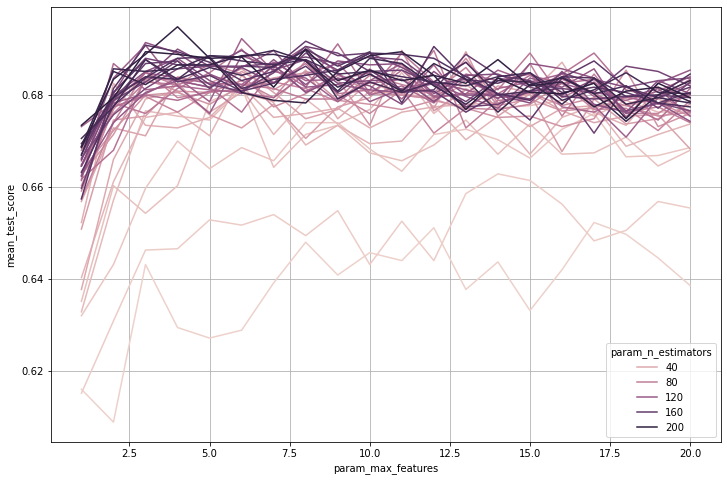

In [52]:
result3 = pd.DataFrame(model_rf3.cv_results_)

temp3 = result3[['param_n_estimators','param_max_features','mean_test_score']]
print(temp3.shape)
plt.figure(figsize=(12,8))
sns.lineplot('param_max_features', 'mean_test_score', data=temp3,
            hue = 'param_n_estimators')
plt.grid()
plt.show()